In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ambulance_game as abg


# Single run simulation


In [10]:
# Simulation Parameters
lambda_2 = 0.15  # Ambulance: 6 arrivals per hour
lambda_1 = 0.2  # Others: 12 arrivals per hour
mu = 0.05  # Service time: 3 services per hour
num_of_servers = 8  # Number of servers: 8 servers
threshold = 4  # Threshold of accepting ambulance patients
seed_num = None  # ciw.seed value
runtime = 1440  # runtime of the simulation


In [11]:
records = abg.models.simulate_model(
    lambda_2=lambda_2,
    lambda_1=lambda_1,
    mu=mu,
    num_of_servers=num_of_servers,
    threshold=threshold,
    seed_num=seed_num,
    runtime=runtime,
).get_all_records()
blocks = [b.time_blocked for b in records]
waits = [w.waiting_time for w in records]
print("Mean blocking time: ", np.mean(blocks))
print("Mean waiting time: ", np.mean(waits))


Mean blocking time:  3.3778791466819125
Mean waiting time:  0.44975228691132385


# Results of multiple simulations


In [4]:
# Simulation Parameters
lambda_2 = 0.15  # Ambulance: 6 arrivals per hour
lambda_1 = 0.2  # Others: 12 arrivals per hour
mu = 0.05  # Service time: 3 services per hour
num_of_servers = 8  # Number of servers: 8 servers
threshold = 4  # Threshold of accepting ambulance patients
seed_num = None  # ciw.seed value
runtime = 1440  # runtime of the simulation

# Multiple runs parameters
warm_up_time = 100
num_of_trials = 10
output_type = "tuple"
seed_num = None


In [5]:
res = abg.models.get_multiple_runs_results(
    lambda_2=lambda_2,
    lambda_1=lambda_1,
    mu=mu,
    num_of_servers=num_of_servers,
    threshold=threshold,
    seed_num=seed_num,
    warm_up_time=warm_up_time,
    num_of_trials=num_of_trials,
    output_type=output_type,
    runtime=runtime,
)
mean_wait = np.mean([np.mean(w.waiting_times) for w in res])
mean_block = np.mean([np.mean(b.blocking_times) for b in res])
print("Mean blocking time for multiple trials: ", mean_block)
print("Mean waiting time for multiple trials: ", mean_wait)


Mean blocking time for multiple trials:  87.0670464676
Mean waiting time for multiple trials:  0.383060698558


# Timing Experiment 1


In [20]:
# Queueing Parameters
lambda_2 = 0.1  # Ambulance: 6 arrivals per hour
lambda_1 = 0.05  # Others: 3 arrivals per hour
mu = 0.05  # Service time: 3 services per hour
num_of_servers = 8  # Number of servers: 8 servers
threshold = 4  # Threshold of accepting ambulance patients

# Timing Experiment parameters
num_of_trials = 500  # Number of trials to be considered
repetition = 15  # Repetition of each trial
method = "Simulation"  # Method to be used (only Simulation available)
filename = "Trials_500_rep_20.txt"


In [21]:
times = abg.time_for_different_number_of_trials(
    lambda_2=lambda_2,
    lambda_1=lambda_1,
    mu=mu,
    num_of_servers=num_of_servers,
    threshold=threshold,
    num_of_trials=num_of_trials,
    repeat_trial=repetition,
    method=method,
    filename=filename,
)


In [16]:
# Old Files: Trials_500_rep_15.txt, Trials_1000_rep_20.txt, Trials_343_rep_50.txt
# New Files: Trials_500_rep_20.txt

# times = abg.old_import_trials_duration(path='Trials/Trials_500_rep_15.txt')
times = abg.import_trials_duration(path="Trials/Trials_500_rep_20.txt")


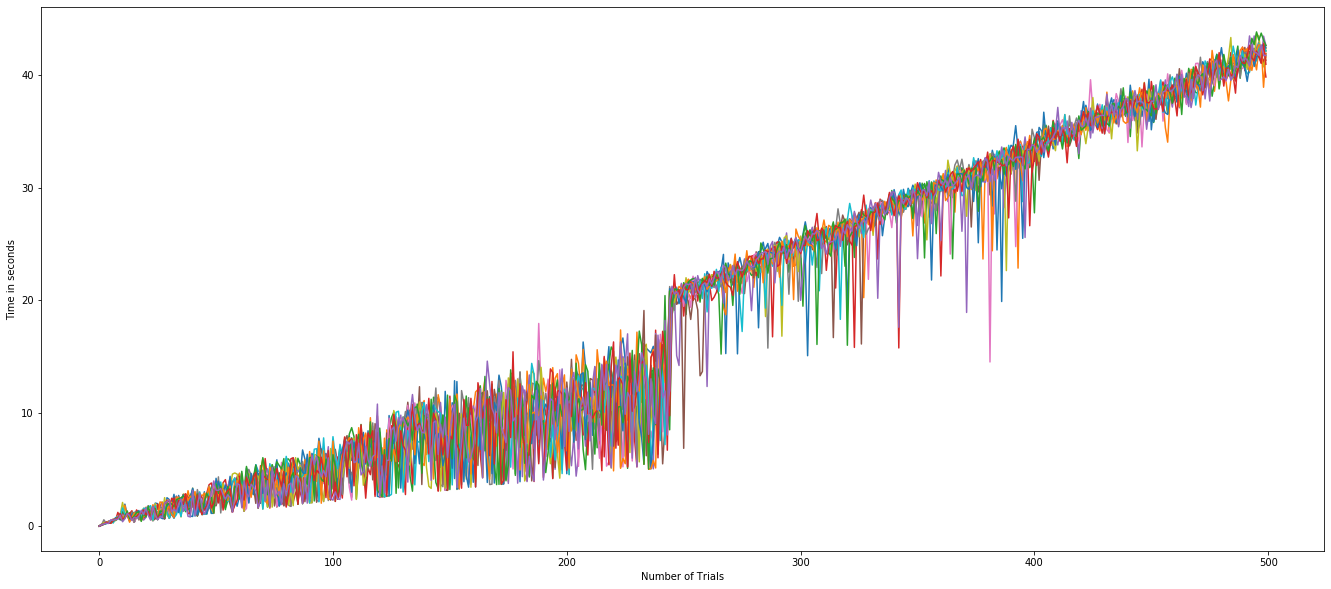

In [7]:
abg.get_duration_all_lines_plot(times=times)
plt.show()


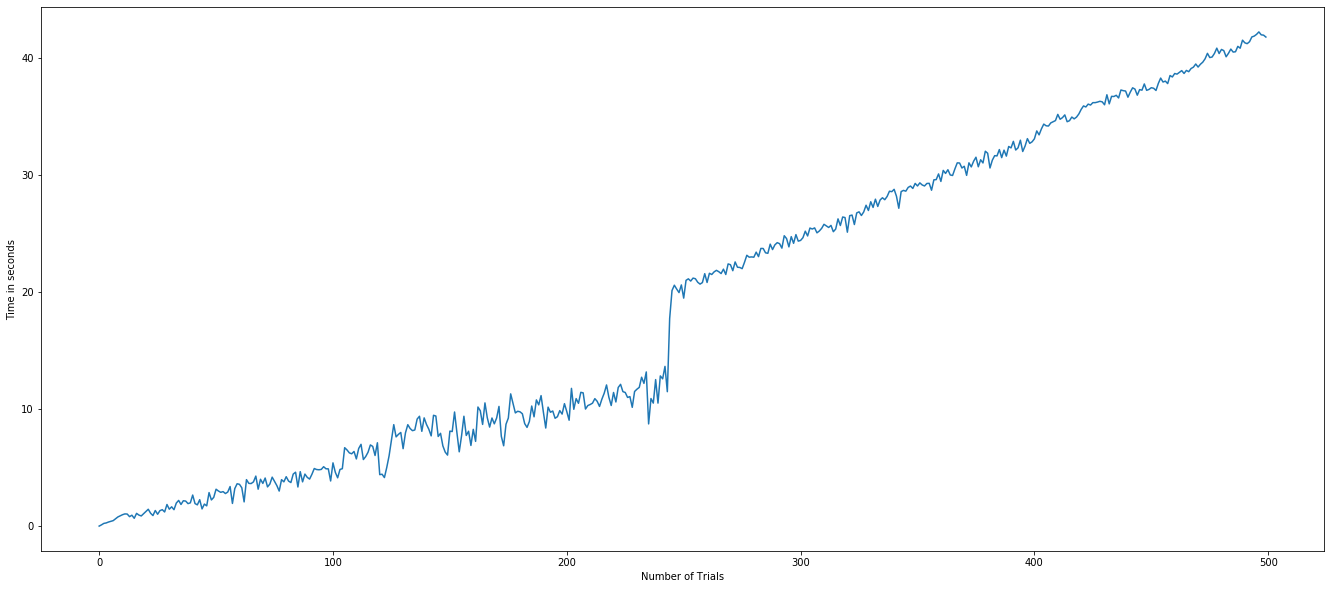

In [8]:
abg.get_duration_mean_plot(times=times)
plt.show()


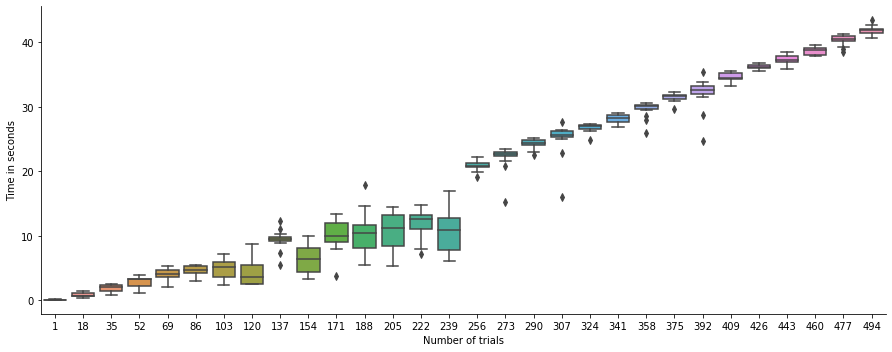

In [9]:
abg.get_duration_distribution_plot(times=times, kind="box")
plt.show()


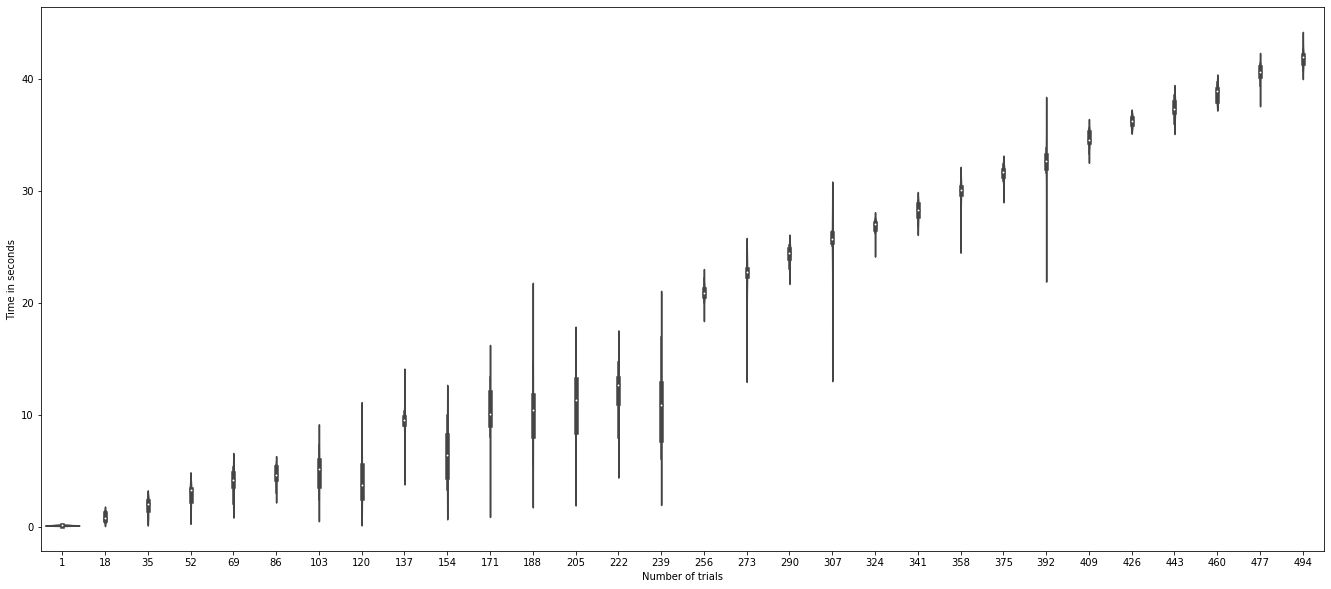

In [10]:
abg.get_duration_distribution_plot(times=times, kind="violin")
plt.show()


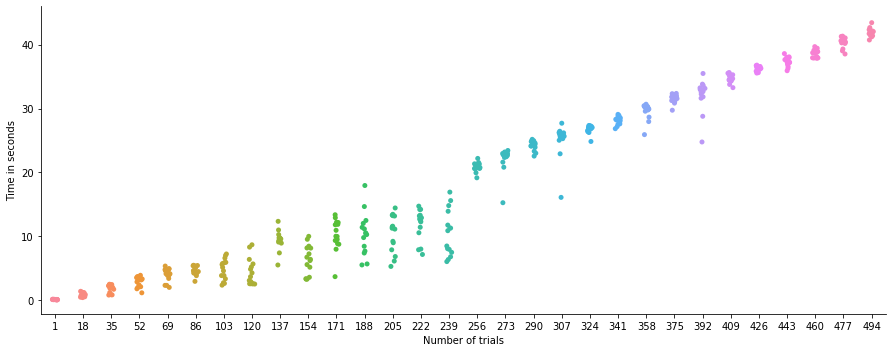

In [11]:
abg.get_duration_distribution_plot(times=times)
plt.show()


# Timing Experiment 2 - Investigate convergence of times


#### Hospital 1: lambda_2 = 0.15, lambda_1 = 0.2, mu = 0.05, num_of_servers = 8, threshold = 5
#### Hospital 2: lambda_2 = 0.15, lambda_1 = 0.1, mu = 0.04, num_of_servers = 7, threshold = 4
#### Hospital 3: lambda_2 = 0.3, lambda_1 = 0.3, mu = 0.05, num_of_servers= 12, threshold = 10
#### Hospital 4: lambda_2 = 0.2, lambda_1 = 0.3, mu = 0.05, num_of_servers= 13, threshold = 5


In [6]:
# Queueing Parameters
lambda_2 = 0.15  # Ambulance: 9 arrivals per hour
lambda_1 = 0.2  # Others: 12 arrivals per hour
mu = 0.05  # Service time: 3 services per hour
num_of_servers = 8  # Number of servers: 8 servers
threshold = 5  # Threshold of accepting ambulance patients
seed_num = None
warm_up_time = 100
output_type = "list"

# Timing Parameters
num_of_trials = 50


In [7]:
time_results = abg.models.get_multiple_runs_results(
    lambda_2=lambda_2,
    lambda_1=lambda_1,
    mu=mu,
    num_of_servers=num_of_servers,
    threshold=threshold,
    seed_num=seed_num,
    warm_up_time=warm_up_time,
    num_of_trials=num_of_trials,
    output_type=output_type,
)
time_results2 = abg.models.get_multiple_runs_results(
    lambda_2=0.15,
    lambda_1=0.1,
    mu=0.04,
    num_of_servers=7,
    threshold=4,
    seed_num=seed_num,
    warm_up_time=warm_up_time,
    num_of_trials=num_of_trials,
    output_type=output_type,
)
time_results3 = abg.models.get_multiple_runs_results(
    lambda_2=0.3,
    lambda_1=0.3,
    mu=0.05,
    num_of_servers=12,
    threshold=10,
    seed_num=seed_num,
    warm_up_time=warm_up_time,
    num_of_trials=num_of_trials,
    output_type=output_type,
)
time_results4 = abg.models.get_multiple_runs_results(
    lambda_2=0.2,
    lambda_1=0.3,
    mu=0.05,
    num_of_servers=13,
    threshold=5,
    seed_num=seed_num,
    warm_up_time=warm_up_time,
    num_of_trials=num_of_trials,
    output_type=output_type,
)


###### Waiting Times


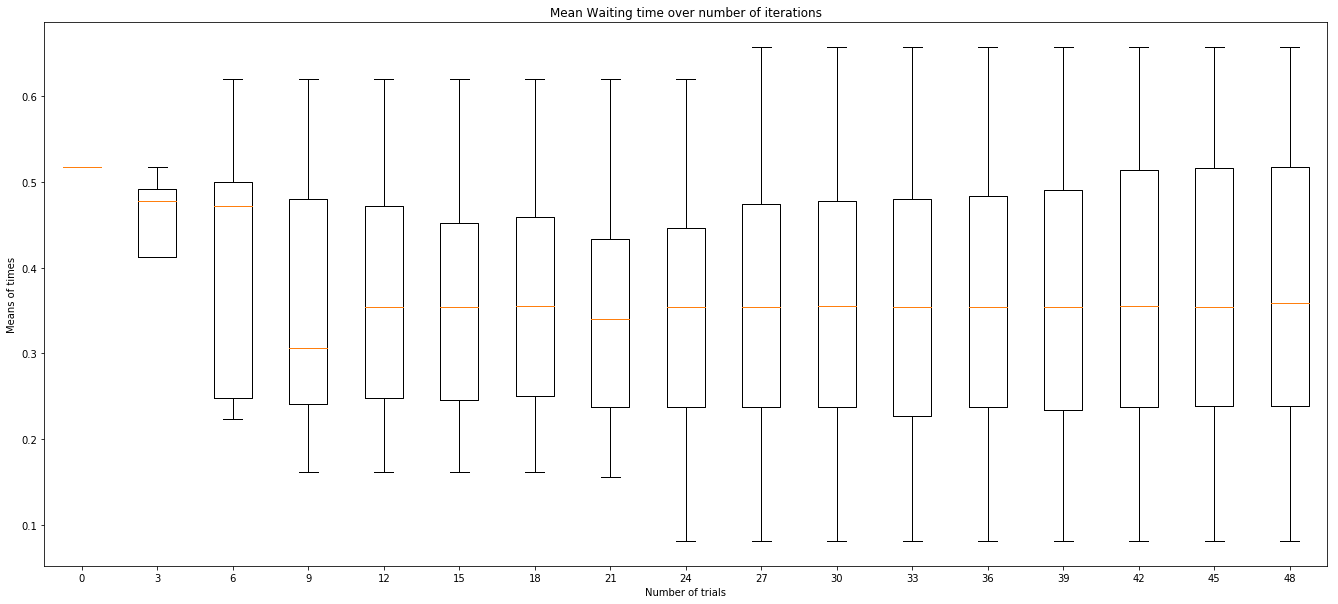

In [8]:
# 1: lambda_2 = 0.15, lambda_1 = 0.2, mu = 0.05, num_of_servers = 8, threshold = 5
abg.make_plot_of_confidence_intervals_over_iterations(
    all_times=time_results, time_type="w"
)
plt.show()


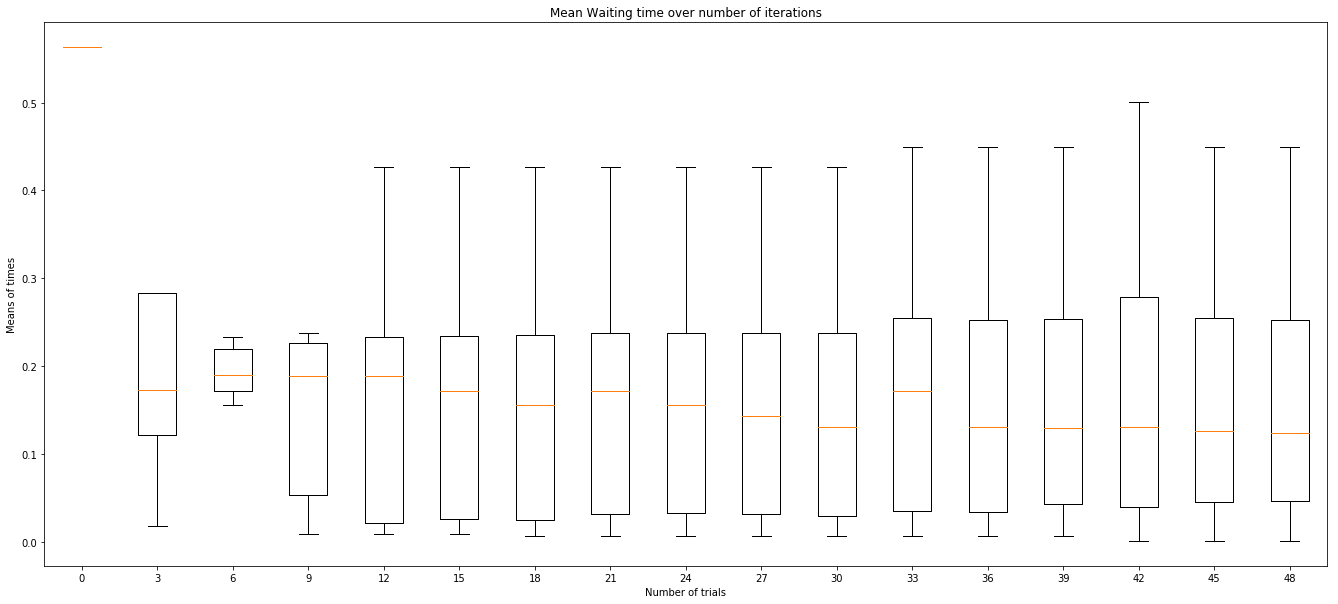

In [9]:
# 2: lambda_2 = 0.15, lambda_1 = 0.1, mu = 0.04, num_of_servers = 7, threshold = 4
abg.make_plot_of_confidence_intervals_over_iterations(
    all_times=time_results2, time_type="w"
)
plt.show()


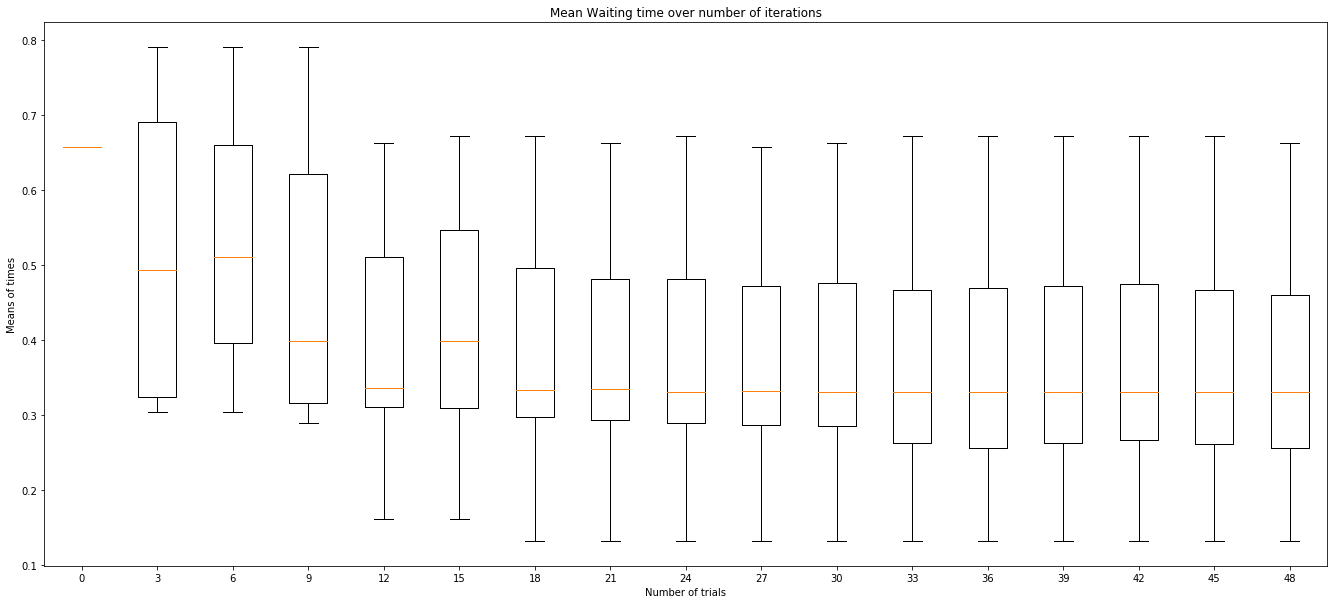

In [10]:
# 3: lambda_2=0.3, lambda_1=0.3, mu=0.05, num_of_servers=12, threshold=10
abg.make_plot_of_confidence_intervals_over_iterations(
    all_times=time_results3, time_type="w"
)
plt.show()


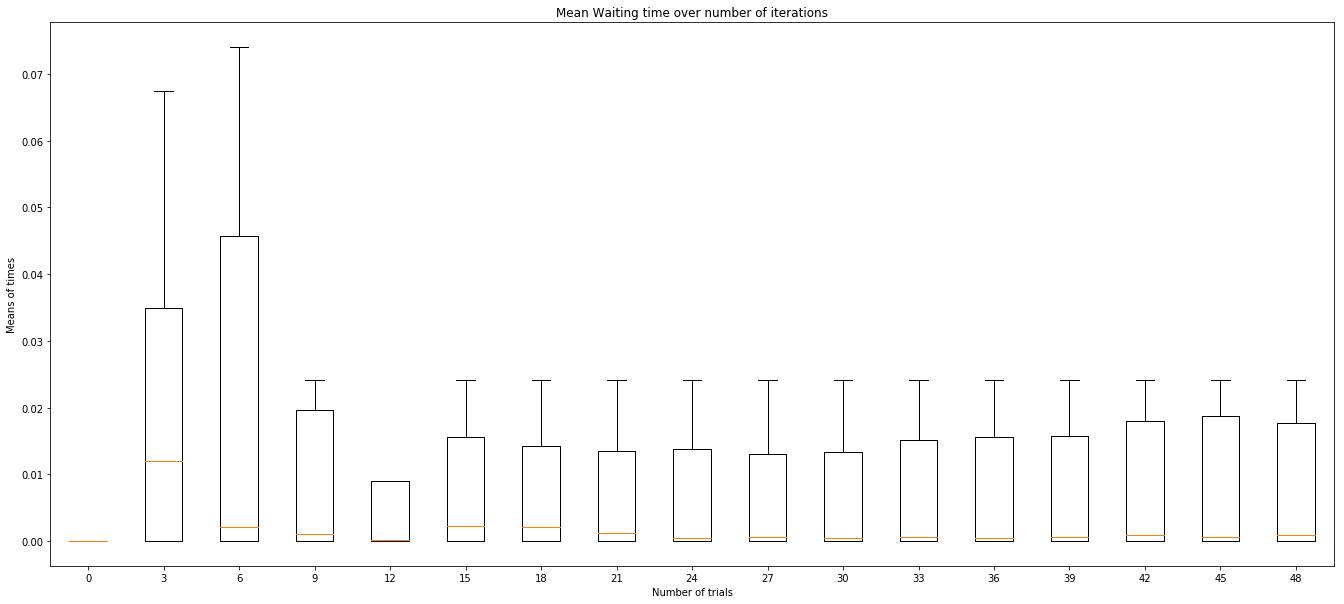

In [11]:
# 4: lambda_2=0.2, lambda_1=0.3, mu=0.05, num_of_servers=13, threshold=5
abg.make_plot_of_confidence_intervals_over_iterations(
    all_times=time_results4, time_type="w"
)
plt.show()


###### Blocking Times


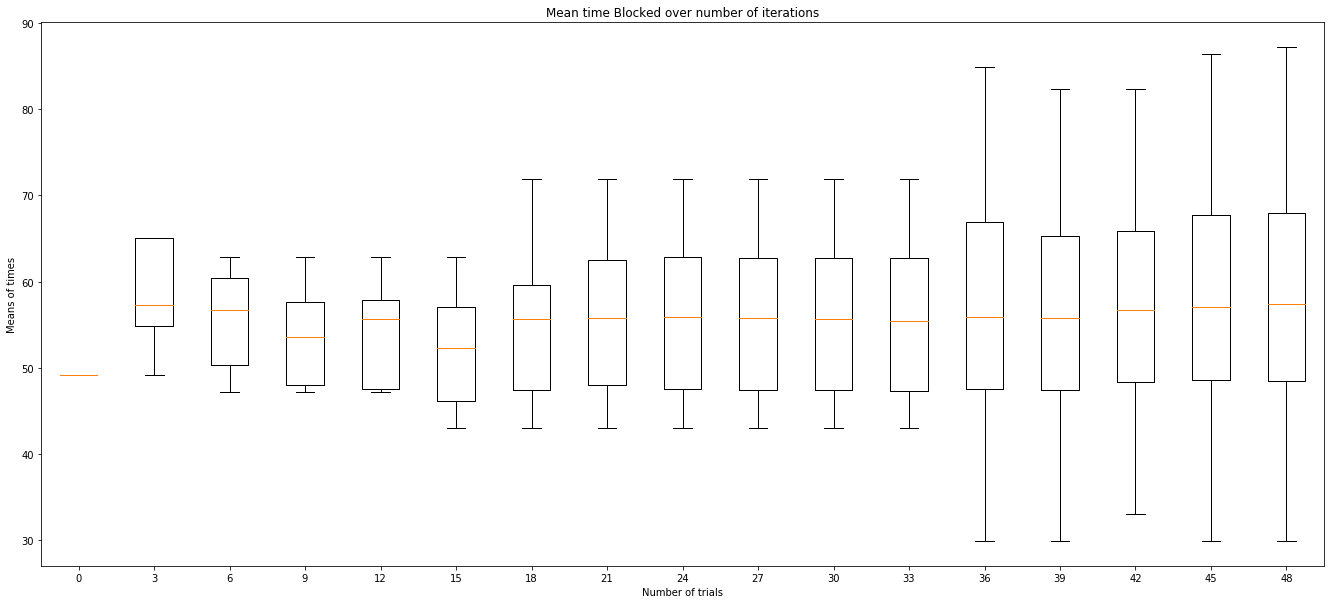

In [12]:
# 1: lambda_2 = 0.15, lambda_1 = 0.2, mu = 0.05, num_of_servers = 8, threshold = 5
abg.make_plot_of_confidence_intervals_over_iterations(
    all_times=time_results, time_type="b"
)
plt.show()


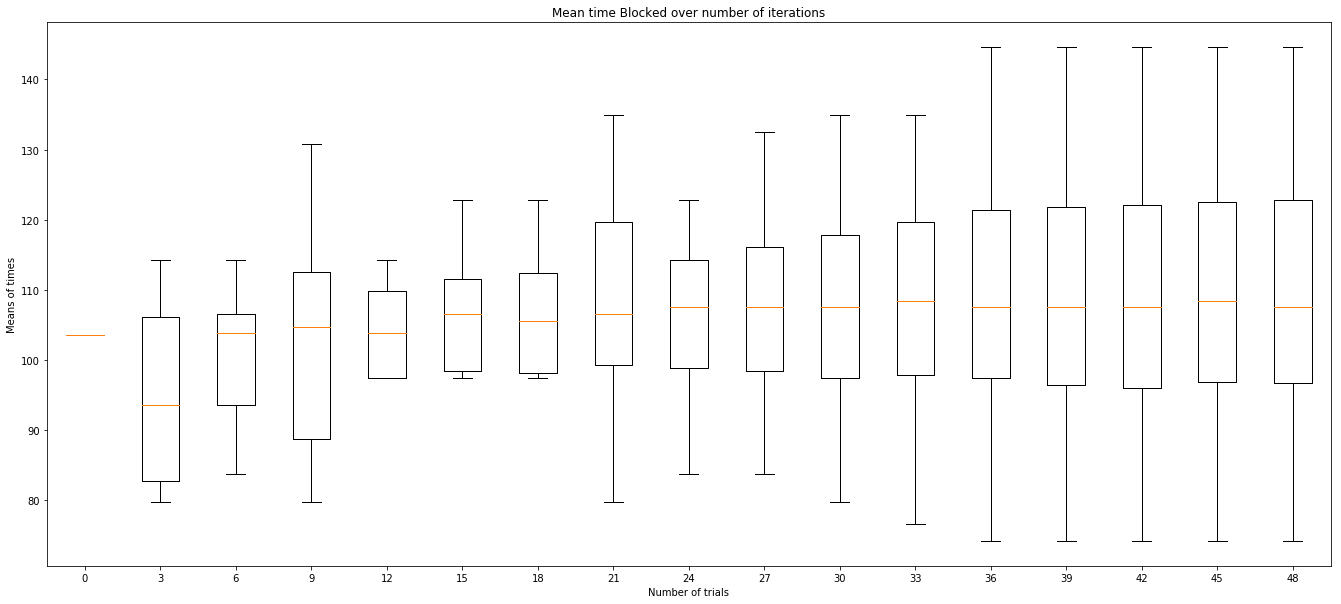

In [13]:
# 2: lambda_2 = 0.15, lambda_1 = 0.1, mu = 0.04, num_of_servers = 7, threshold = 4
abg.make_plot_of_confidence_intervals_over_iterations(
    all_times=time_results2, time_type="b"
)
plt.show()


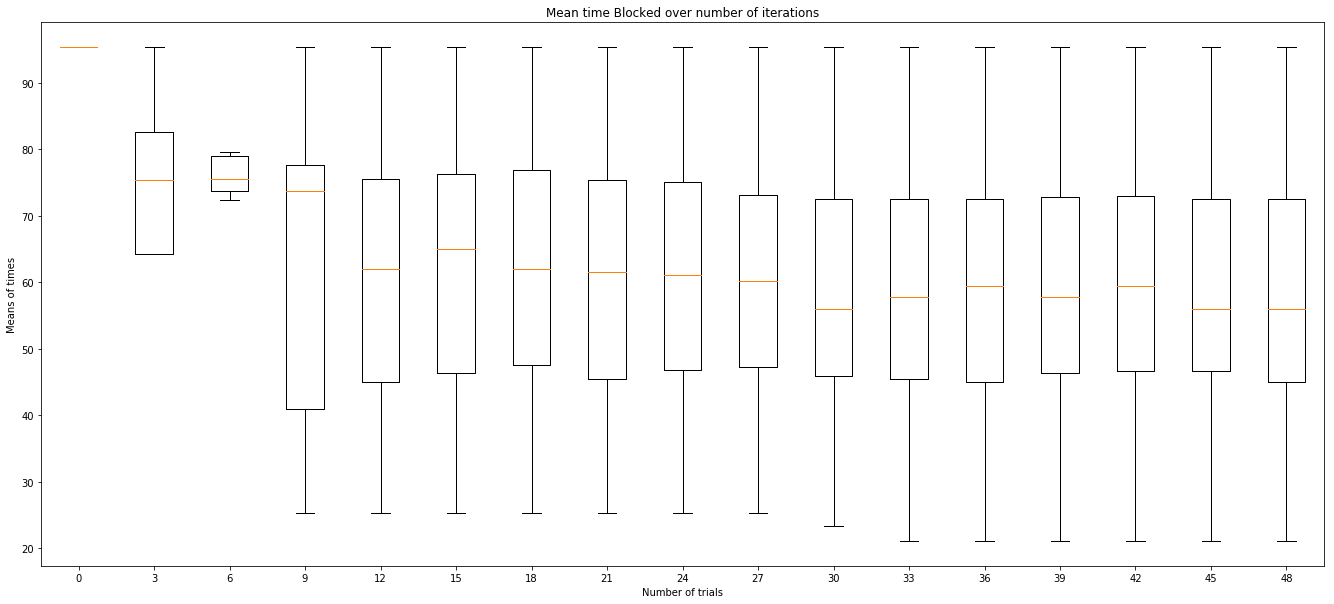

In [14]:
# 3: lambda_2=0.3, lambda_1=0.3, mu=0.05, num_of_servers=12, threshold=10
abg.make_plot_of_confidence_intervals_over_iterations(
    all_times=time_results3, time_type="b"
)
plt.show()


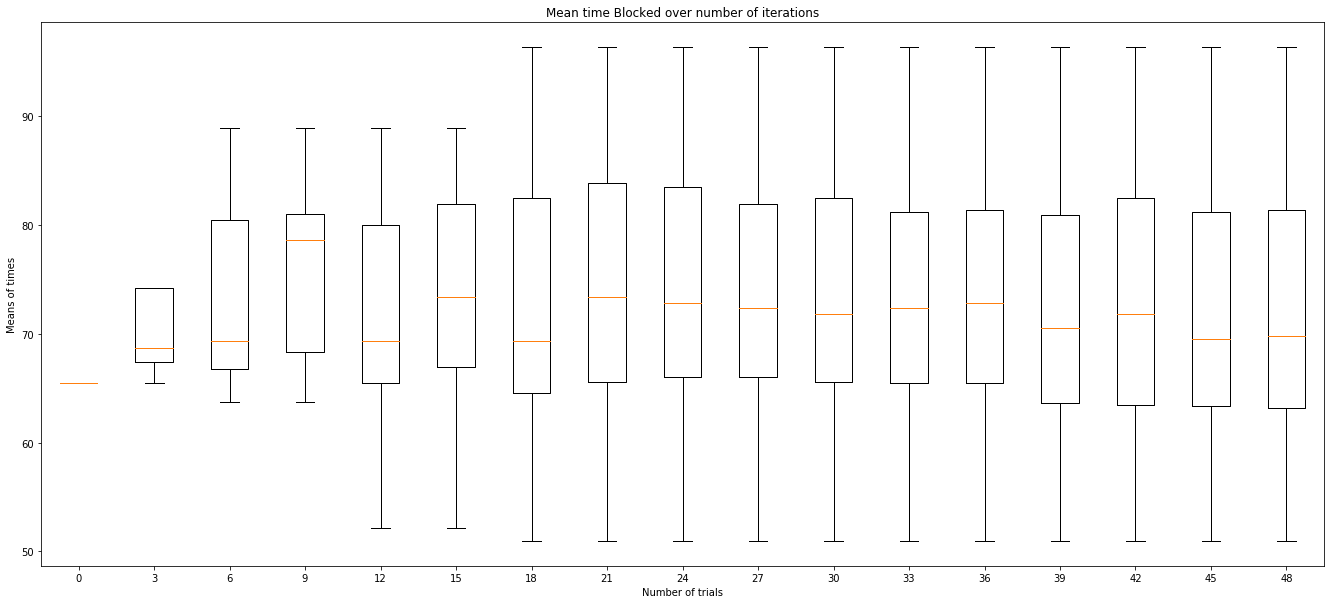

In [15]:
# 4: lambda_2=0.2, lambda_1=0.3, mu=0.05, num_of_servers=13, threshold=5
abg.make_plot_of_confidence_intervals_over_iterations(
    all_times=time_results4, time_type="b"
)
plt.show()


# Model plot 1 - Plots for different thresholds


In [16]:
# Queueing Parameters
lambda_2 = 0.1  # Ambulance: 6 arrivals per hour
lambda_1 = 0.05  # Others: 3 arrivals per hour
mu = 0.02  # Service time: 3 services per hour
num_of_servers = 8  # Number of servers: 8 servers
seed_num = None
runtime = 1440

# Plot Parameters
num_of_trials = 500
measurement_type = "both"  # The measurement to be plotted ["w":waiting times, "b":blocking times, otherwise: both]


###### Waiting Times


C:\Users\Michalis\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Michalis\Anaconda\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


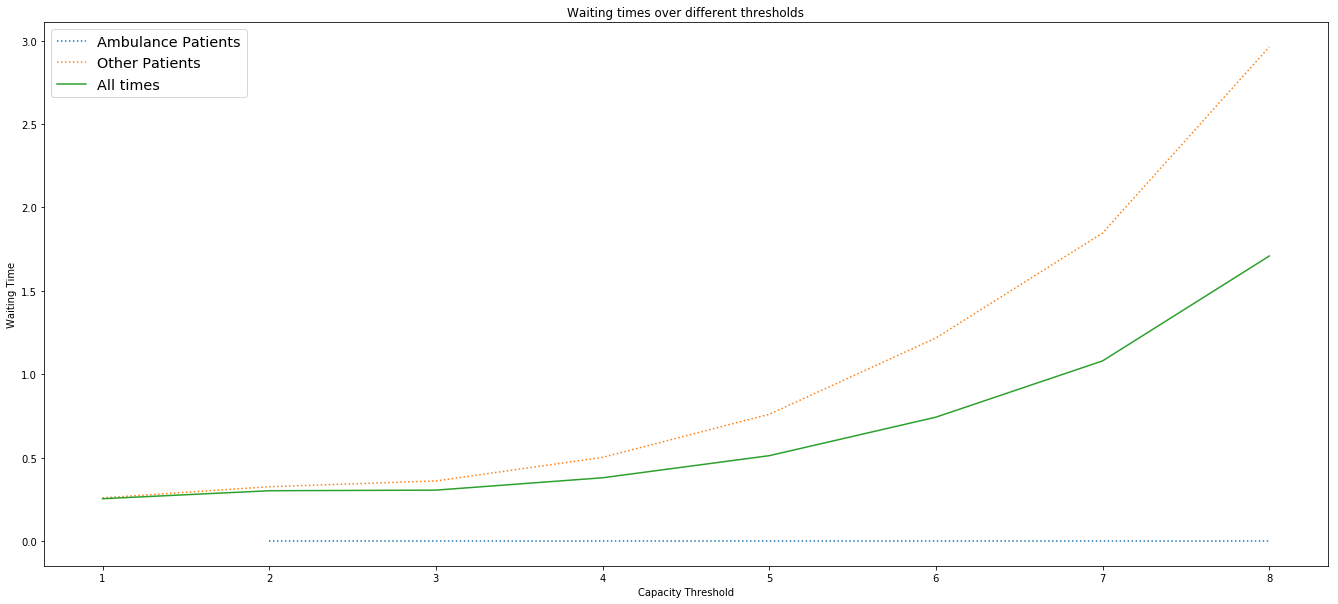

In [17]:
# 1: lambda_2 = 0.15, lambda_1 = 0.2, mu = 0.05, num_of_servers = 8
abg.make_plot_for_different_thresholds(
    lambda_2=0.15,
    lambda_1=0.2,
    mu=0.05,
    num_of_servers=8,
    num_of_trials=num_of_trials,
    seed_num=seed_num,
    measurement_type="w",
    runtime=runtime,
)
plt.show()


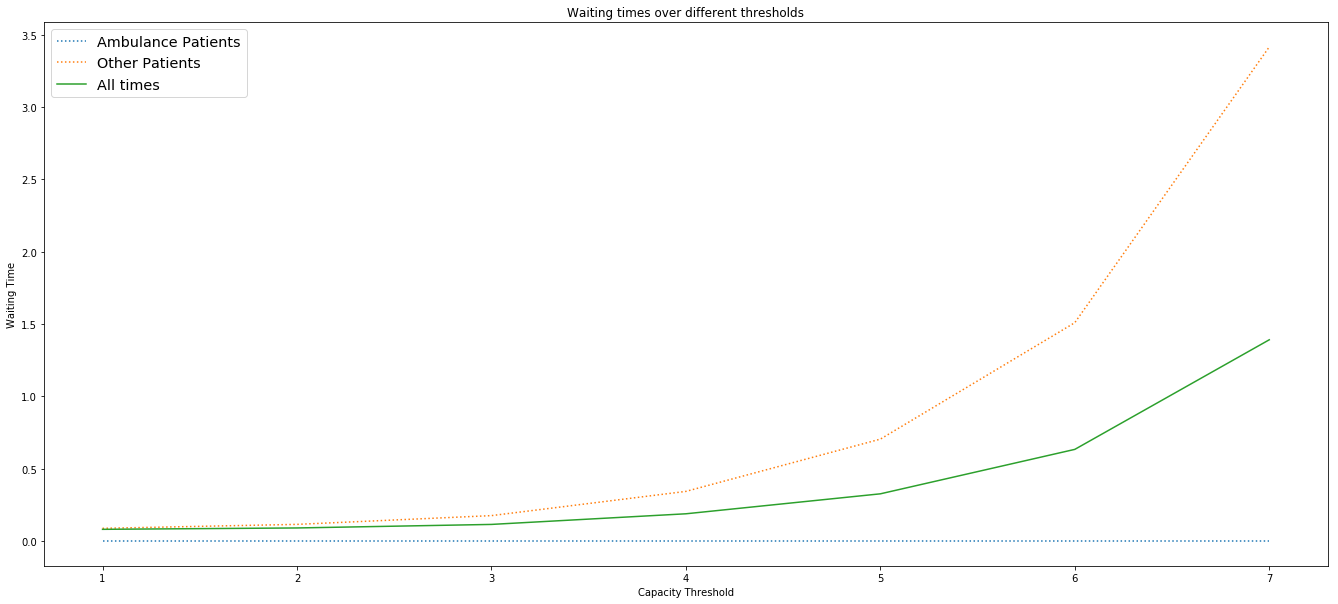

In [18]:
# 2: lambda_2=0.15, lambda_1=0.1, mu=0.04, num_of_servers=7
abg.make_plot_for_different_thresholds(
    lambda_2=0.15,
    lambda_1=0.1,
    mu=0.04,
    num_of_servers=7,
    num_of_trials=num_of_trials,
    seed_num=seed_num,
    measurement_type="w",
    runtime=runtime,
)
plt.show()


C:\Users\Michalis\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Michalis\Anaconda\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


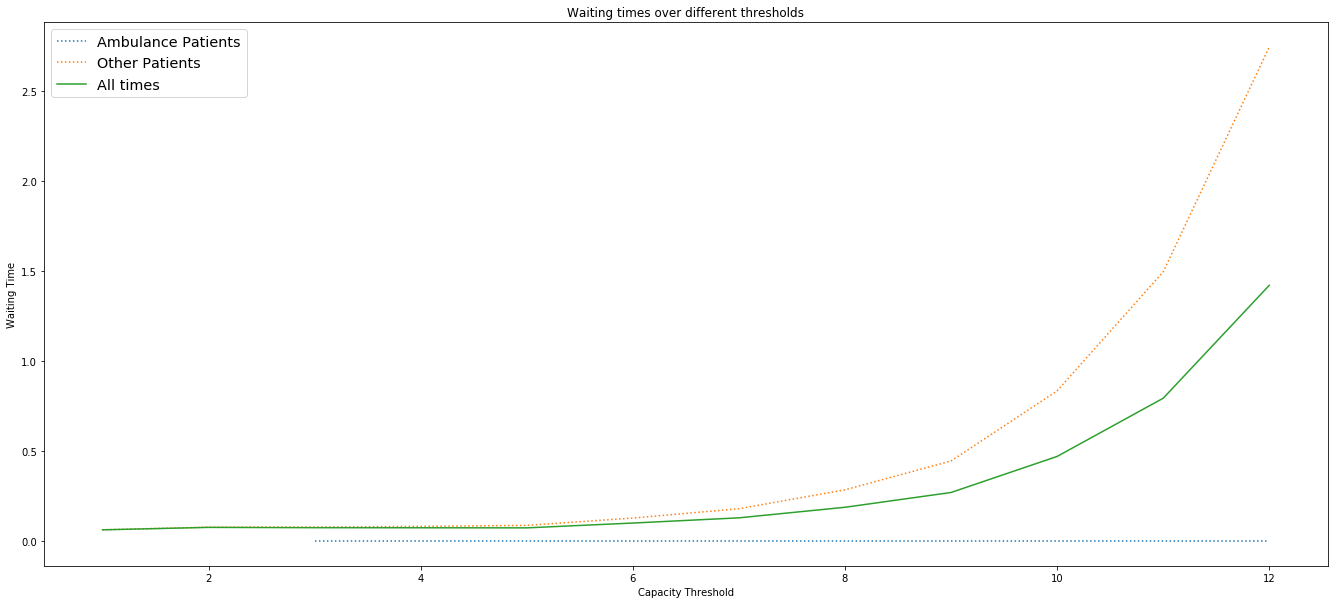

In [19]:
# 3: lambda_2=0.3, lambda_1=0.3, mu=0.05, num_of_servers=12
abg.make_plot_for_different_thresholds(
    lambda_2=0.3,
    lambda_1=0.3,
    mu=0.05,
    num_of_servers=12,
    num_of_trials=num_of_trials,
    seed_num=seed_num,
    measurement_type="w",
    runtime=runtime,
)
plt.show()


C:\Users\Michalis\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Michalis\Anaconda\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


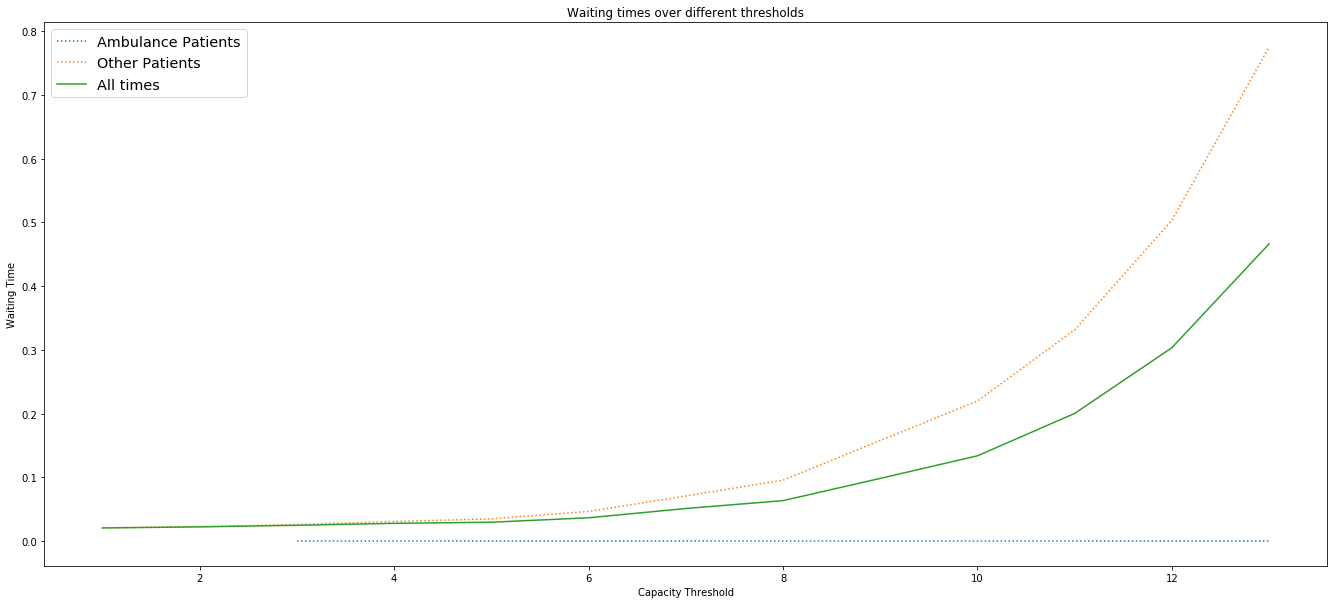

In [20]:
# 4: lambda_2=0.2, lambda_1=0.3, mu=0.05, num_of_servers=13
abg.make_plot_for_different_thresholds(
    lambda_2=0.2,
    lambda_1=0.3,
    mu=0.05,
    num_of_servers=13,
    num_of_trials=num_of_trials,
    seed_num=seed_num,
    measurement_type="w",
    runtime=runtime,
)
plt.show()


###### Blocking Times


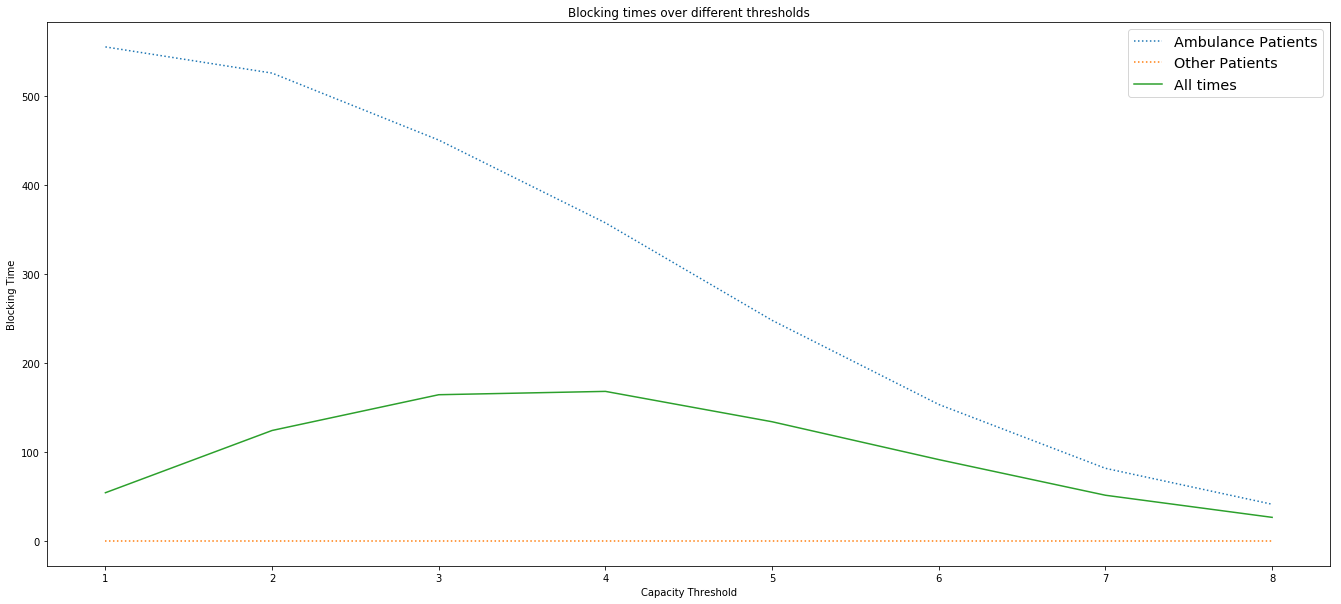

In [21]:
# 1: lambda_2 = 0.15, lambda_1 = 0.2, mu = 0.05, num_of_servers = 8
abg.make_plot_for_different_thresholds(
    lambda_2=lambda_2,
    lambda_1=lambda_1,
    mu=mu,
    num_of_servers=num_of_servers,
    num_of_trials=num_of_trials,
    seed_num=seed_num,
    measurement_type="b",
    runtime=runtime,
)
plt.show()


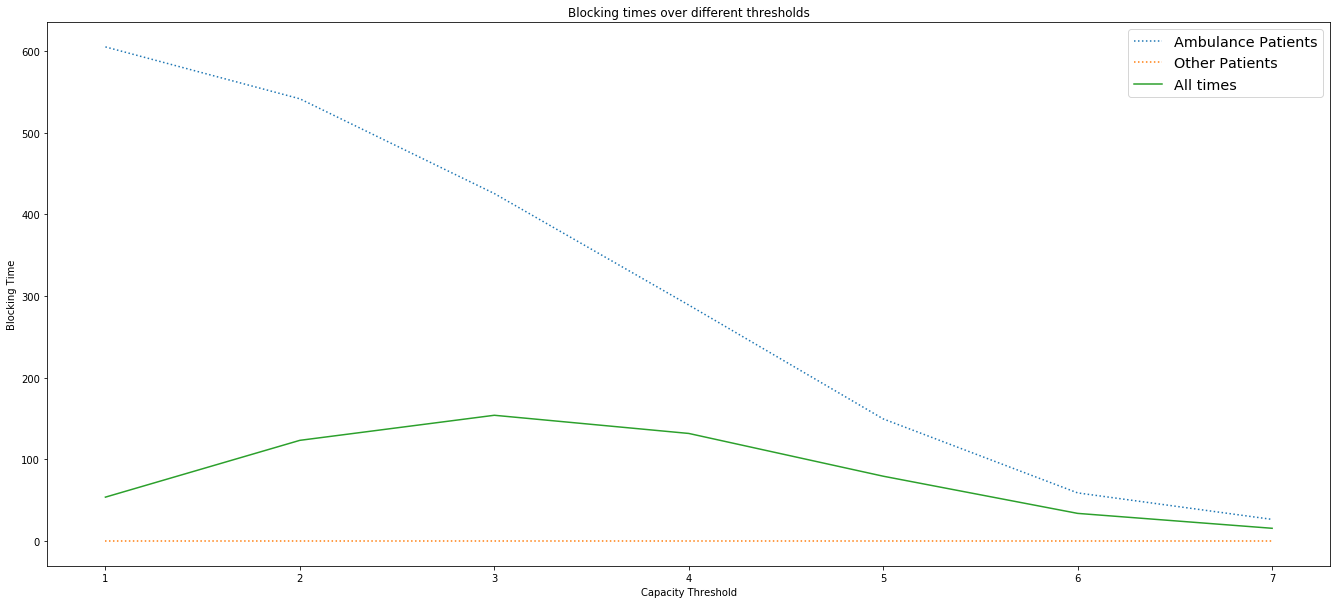

In [22]:
# 2: lambda_2=0.15, lambda_1=0.1, mu=0.04, num_of_servers=7
abg.make_plot_for_different_thresholds(
    lambda_2=0.15,
    lambda_1=0.1,
    mu=0.04,
    num_of_servers=7,
    num_of_trials=num_of_trials,
    seed_num=seed_num,
    measurement_type="b",
    runtime=runtime,
)
plt.show()


C:\Users\Michalis\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Michalis\Anaconda\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


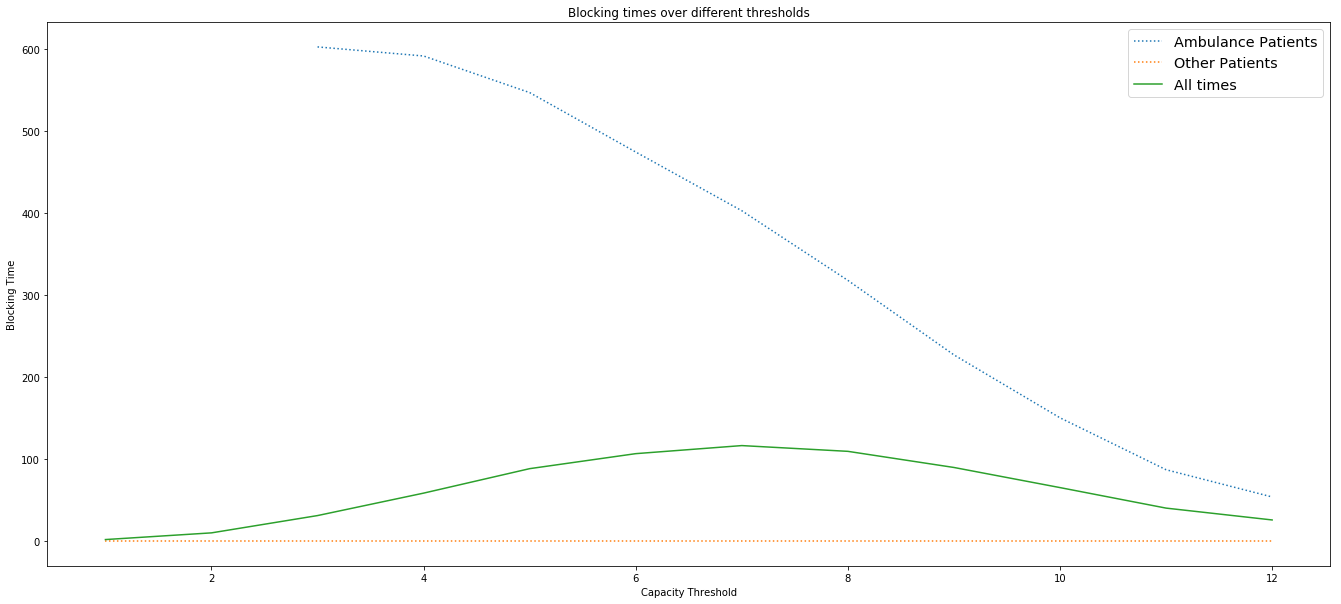

In [23]:
# 3: lambda_2=0.3, lambda_1=0.3, mu=0.05, num_of_servers=12
abg.make_plot_for_different_thresholds(
    lambda_2=0.3,
    lambda_1=0.3,
    mu=0.05,
    num_of_servers=12,
    num_of_trials=num_of_trials,
    seed_num=seed_num,
    measurement_type="b",
    runtime=runtime,
)
plt.show()


C:\Users\Michalis\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Michalis\Anaconda\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


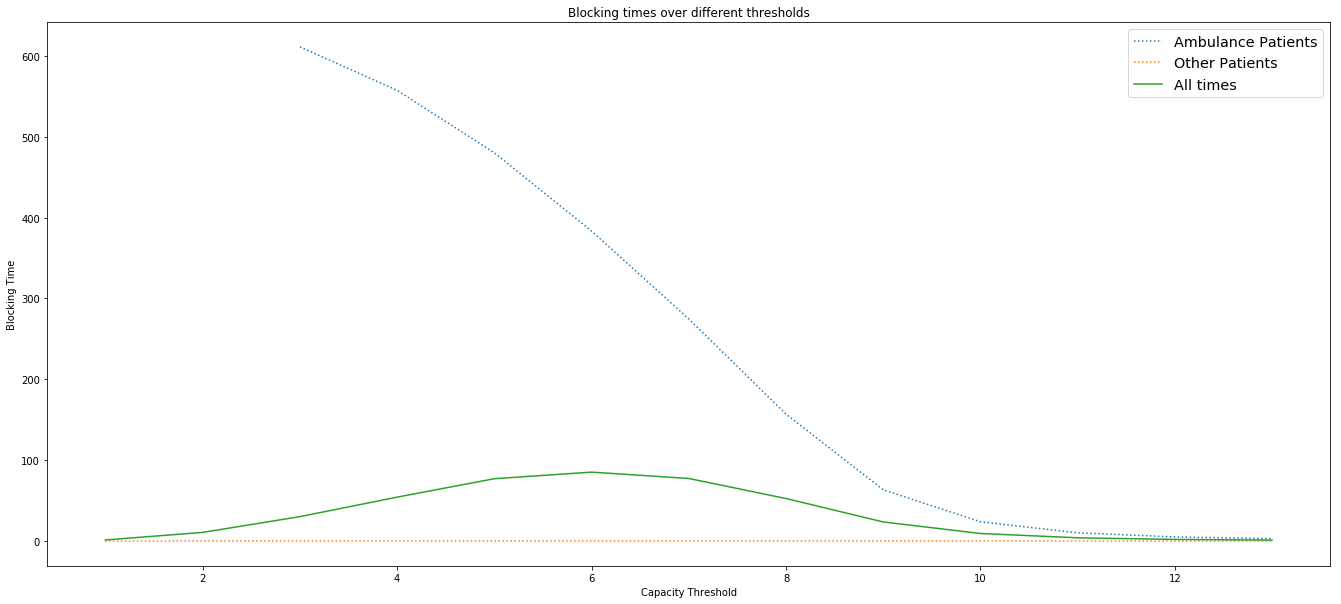

In [24]:
# 4: lambda_2=0.2, lambda_1=0.3, mu=0.05, num_of_servers=13
abg.make_plot_for_different_thresholds(
    lambda_2=0.2,
    lambda_1=0.3,
    mu=0.05,
    num_of_servers=13,
    num_of_trials=num_of_trials,
    seed_num=seed_num,
    measurement_type="b",
    runtime=runtime,
)
plt.show()


# Model plot 2 - Plots of proportion within time limit


In [25]:
# Queueing Parameters
lambda_2 = 0.1  # Ambulance: 6 arrivals per hour
lambda_1 = 0.08  # Others: 4.8 arrivals per hour
mu = 0.03  # Service time: 1.8 services per hour
num_of_servers = 6  # Number of servers: 6 servers
seed_num = 10
runtime = 1440

# Plot Parameters
num_of_trials = 200
target = 4


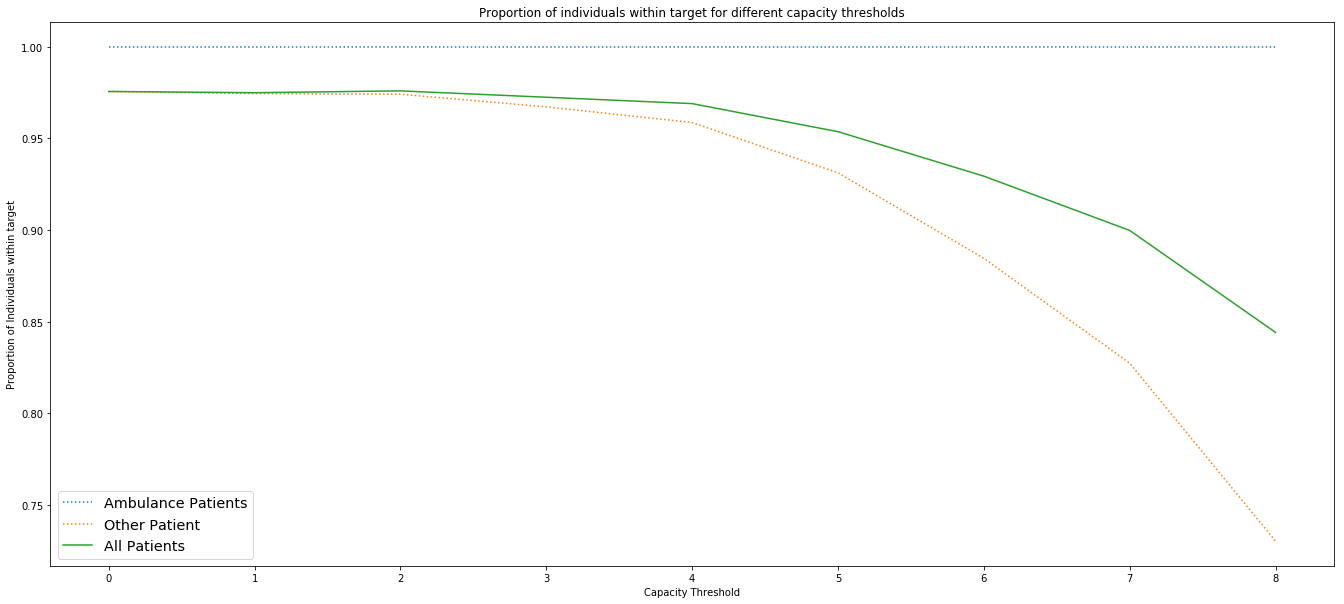

In [26]:
# 1: lambda_2=0.15, lambda_1=0.2, mu=0.05, num_of_servers=8
abg.make_proportion_plot(
    lambda_2=0.15,
    lambda_1=0.2,
    mu=0.05,
    num_of_servers=8,
    num_of_trials=num_of_trials,
    seed_num=seed_num,
    target=target,
    runtime=runtime,
)
plt.show()


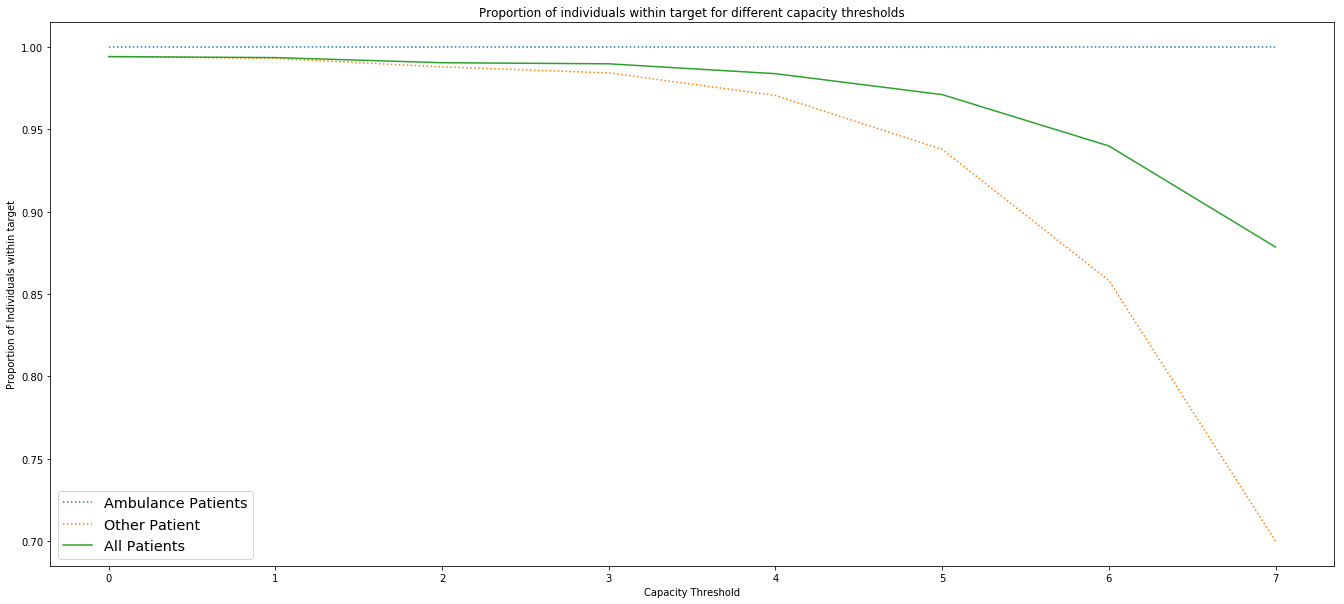

In [27]:
# 2: lambda_2=0.15, lambda_1=0.1, mu=0.04, num_of_servers=7
abg.make_proportion_plot(
    lambda_2=0.15,
    lambda_1=0.1,
    mu=0.04,
    num_of_servers=7,
    num_of_trials=num_of_trials,
    seed_num=seed_num,
    target=target,
    runtime=runtime,
)
plt.show()


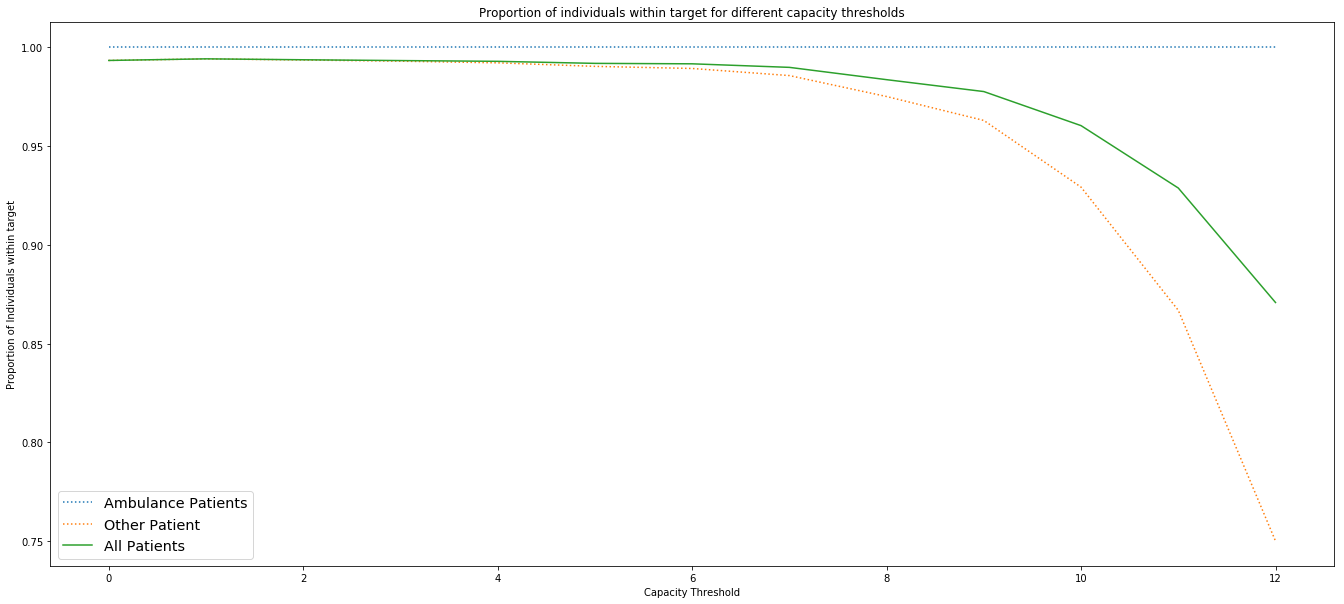

In [28]:
# 3: lambda_2=0.3, lambda_1=0.3, mu=0.05, num_of_servers=12
abg.make_proportion_plot(
    lambda_2=0.3,
    lambda_1=0.3,
    mu=0.05,
    num_of_servers=12,
    num_of_trials=num_of_trials,
    seed_num=seed_num,
    target=target,
    runtime=runtime,
)
plt.show()


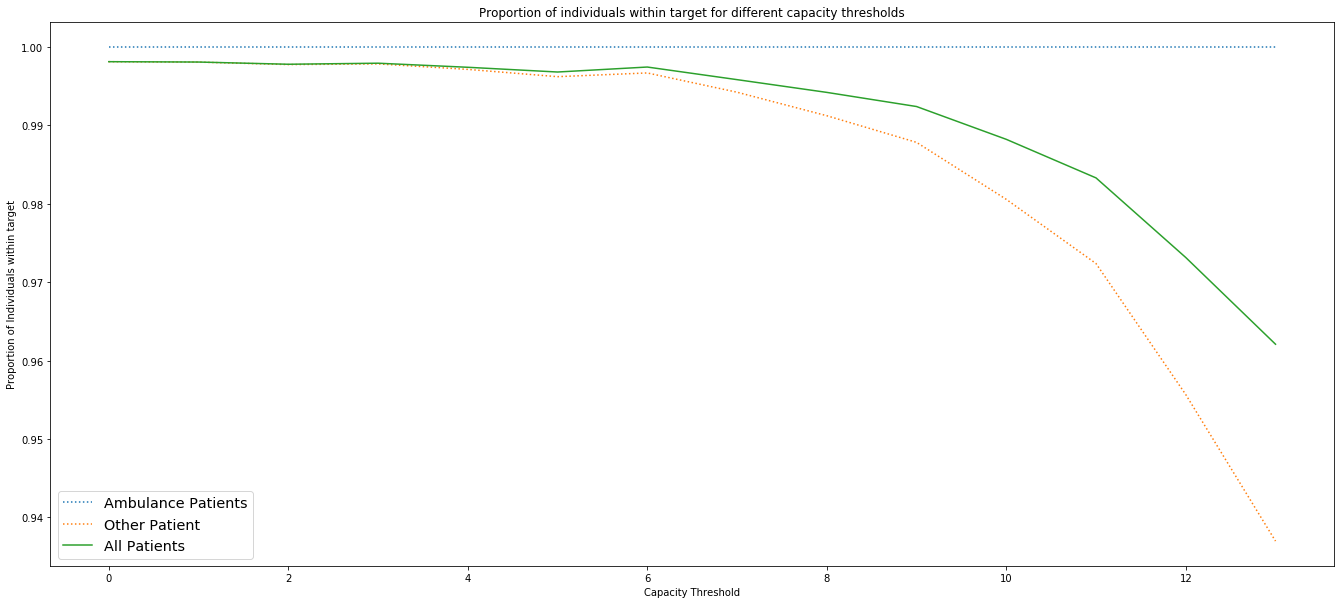

In [29]:
# 4: lambda_2=0.2, lambda_1=0.3, mu=0.05, num_of_servers=13
abg.make_proportion_plot(
    lambda_2=0.2,
    lambda_1=0.3,
    mu=0.05,
    num_of_servers=13,
    num_of_trials=num_of_trials,
    seed_num=seed_num,
    target=target,
    runtime=runtime,
)
plt.show()


# Model plot 3 - Plot of waiting/blocking times VS thresholds for 2 hospitals


In [30]:
# System Parameters
lambda_2 = 0.15
runtime = 1440

# Hospital 1 Parameters
lambda_1_1 = 0.08  # Others: 4.8 arrivals per hour
mu_1 = 0.03  # Service time: 1.8 services per hour
num_of_servers_1 = 6  # Number of servers: 6 servers
threshold_1 = 3

# Hospital 2 Parameters
lambda_1_2 = 0.08
mu_2 = 0.03
num_of_servers_2 = 6
threshold_2 = 3

# Plot Parameters
seed_num_1 = None
seed_num_2 = None
warm_up_time = 100
num_of_trials = 1000
accuracy = 20


###### Waiting Times


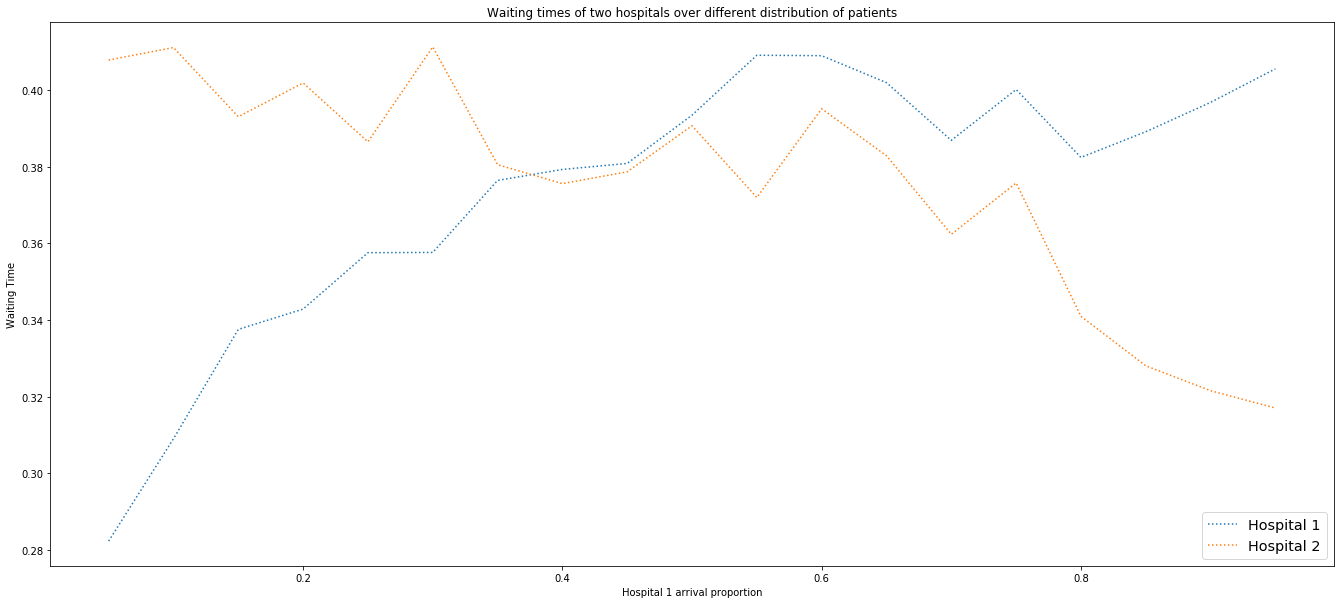

In [31]:
# 1: lambda_2 = 0.3, lambda_1_1 = 0.2, lambda_1_2 = 0.2, mu_1 = 0.05, mu_2 = 0.05, num_of_servers_1 = 8, num_of_servers_2 = 8, threshold_1 = 5, threshold_2 = 5
abg.make_plot_two_hospitals_arrival_split(
    lambda_2=0.3,
    lambda_1_1=0.2,
    lambda_1_2=0.2,
    mu_1=0.05,
    mu_2=0.05,
    num_of_servers_1=8,
    num_of_servers_2=8,
    threshold_1=5,
    threshold_2=5,
    measurement_type="w",
    seed_num_1=seed_num_1,
    seed_num_2=seed_num_2,
    warm_up_time=warm_up_time,
    trials=num_of_trials,
    accuracy=accuracy,
    runtime=runtime,
)
plt.show()


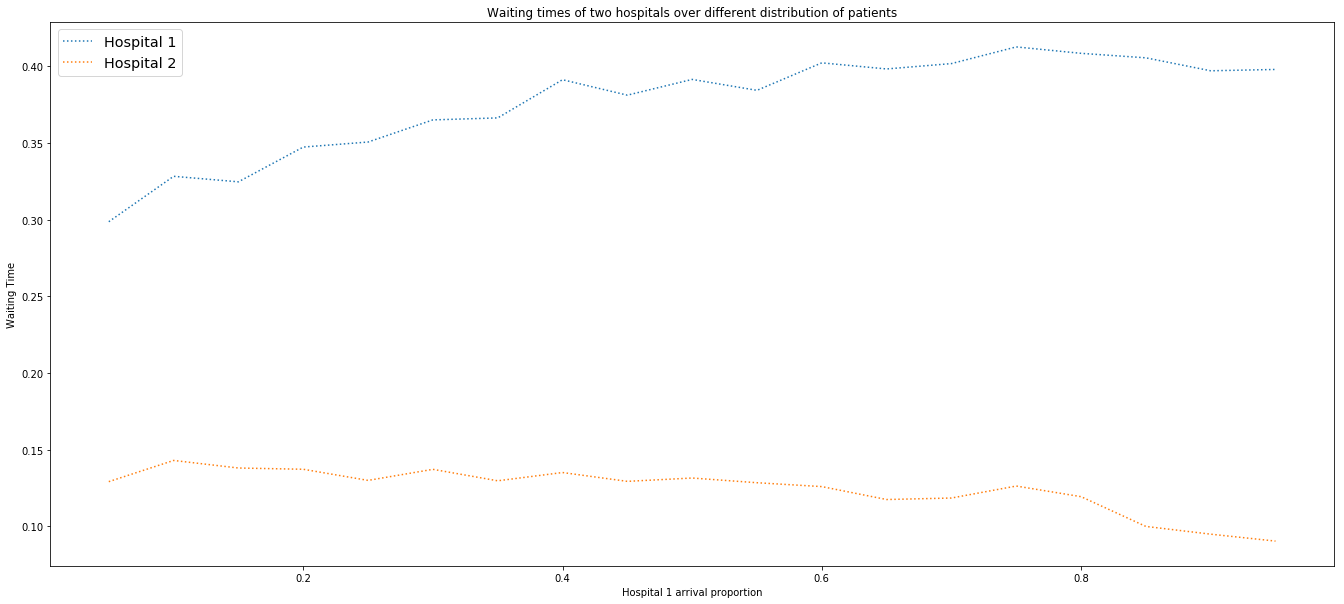

In [32]:
# 2: lambda_2 = 0.3, lambda_1_1 = 0.2, lambda_1_2 = 0.1, mu_1 = 0.05, mu_2 = 0.04, num_of_servers_1 = 8, num_of_servers_2 = 7, threshold_1 = 5, threshold_2 = 4
abg.make_plot_two_hospitals_arrival_split(
    lambda_2=0.3,
    lambda_1_1=0.2,
    lambda_1_2=0.1,
    mu_1=0.05,
    mu_2=0.04,
    num_of_servers_1=8,
    num_of_servers_2=7,
    threshold_1=5,
    threshold_2=4,
    measurement_type="w",
    seed_num_1=seed_num_1,
    seed_num_2=seed_num_2,
    warm_up_time=warm_up_time,
    trials=num_of_trials,
    accuracy=accuracy,
    runtime=runtime,
)
plt.show()


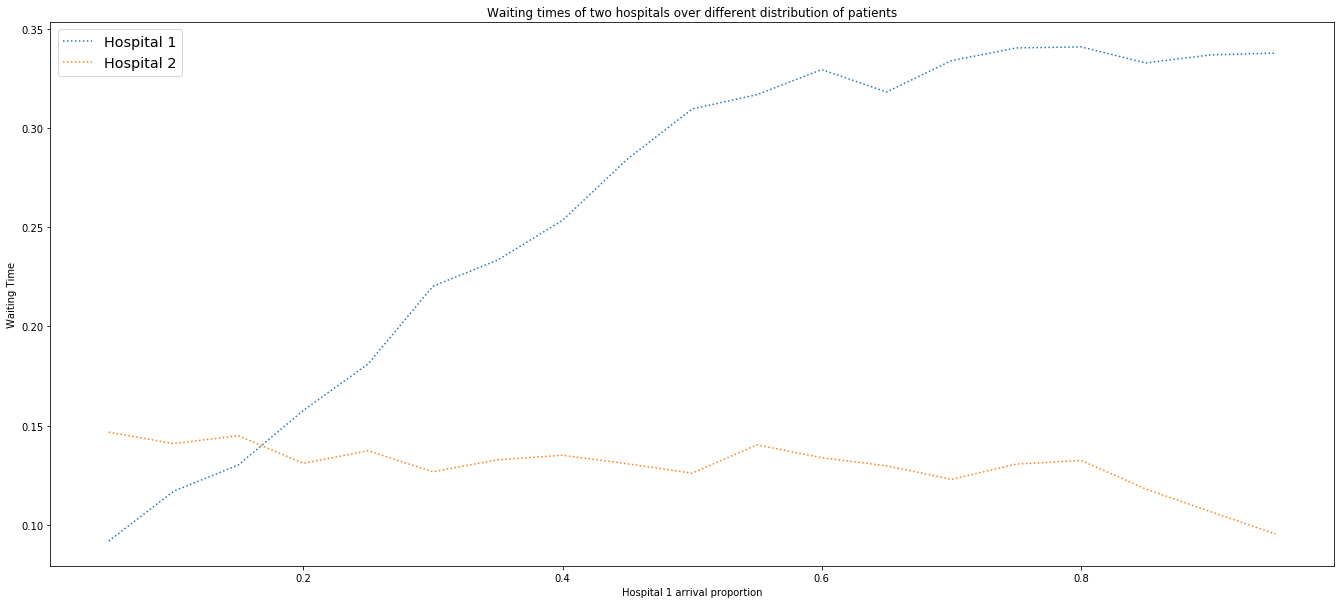

In [33]:
# 3: lambda_2 = 0.45, lambda_1_1 = 0.3, lambda_1_2 = 0.1, mu_1 = 0.05, mu_2 = 0.04, num_of_servers_1 = 12, num_of_servers_2 = 7, threshold_1 = 10, threshold_2 = 4
abg.make_plot_two_hospitals_arrival_split(
    lambda_2=0.45,
    lambda_1_1=0.3,
    lambda_1_2=0.1,
    mu_1=0.05,
    mu_2=0.04,
    num_of_servers_1=12,
    num_of_servers_2=7,
    threshold_1=10,
    threshold_2=4,
    measurement_type="w",
    seed_num_1=seed_num_1,
    seed_num_2=seed_num_2,
    warm_up_time=warm_up_time,
    trials=num_of_trials,
    accuracy=accuracy,
    runtime=runtime,
)
plt.show()


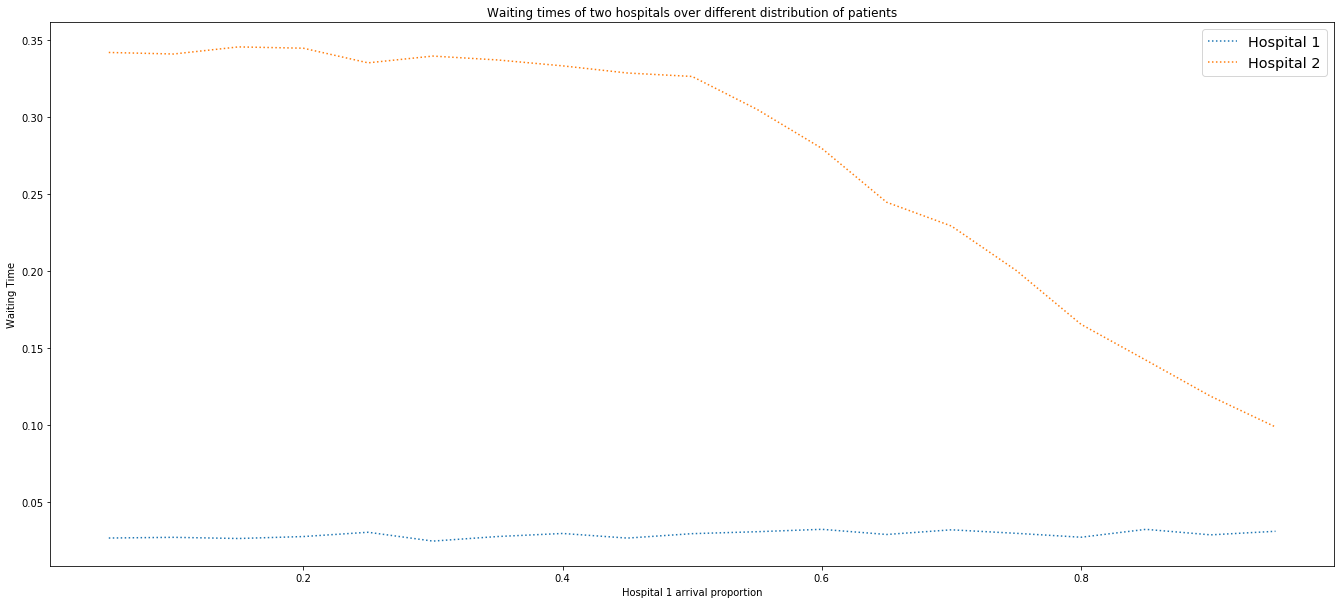

In [34]:
# 4: lambda_2 = 0.5, lambda_1_1 = 0.3, lambda_1_2 = 0.3, mu_1 = 0.05, mu_2 = 0.05, num_of_servers_1 = 13, num_of_servers_2 = 12, threshold_1 = 5, threshold_2 = 10
abg.make_plot_two_hospitals_arrival_split(
    lambda_2=0.5,
    lambda_1_1=0.3,
    lambda_1_2=0.3,
    mu_1=0.05,
    mu_2=0.05,
    num_of_servers_1=13,
    num_of_servers_2=12,
    threshold_1=5,
    threshold_2=10,
    measurement_type="w",
    seed_num_1=seed_num_1,
    seed_num_2=seed_num_2,
    warm_up_time=warm_up_time,
    trials=num_of_trials,
    accuracy=accuracy,
    runtime=runtime,
)
plt.show()


###### Blocking Times


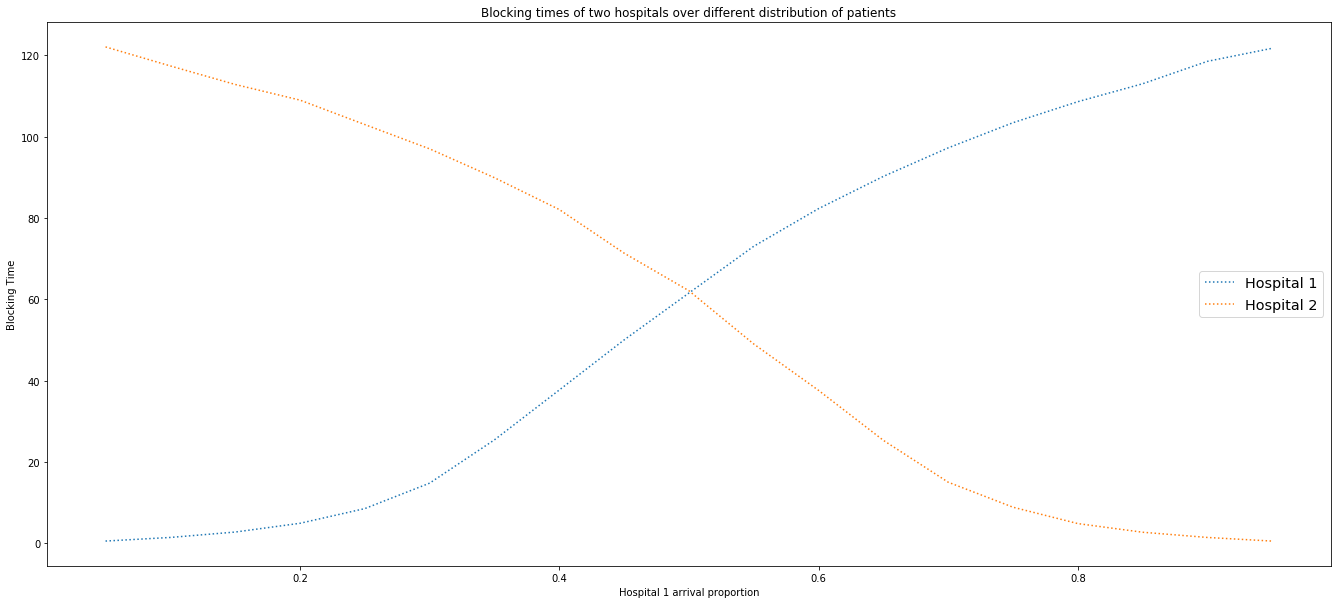

In [35]:
# 1: lambda_2 = 0.3, lambda_1_1 = 0.2, lambda_1_2 = 0.2, mu_1 = 0.05, mu_2 = 0.05, num_of_servers_1 = 8, num_of_servers_2 = 8, threshold_1 = 5, threshold_2 = 5
abg.make_plot_two_hospitals_arrival_split(
    lambda_2=0.3,
    lambda_1_1=0.2,
    lambda_1_2=0.2,
    mu_1=0.05,
    mu_2=0.05,
    num_of_servers_1=8,
    num_of_servers_2=8,
    threshold_1=5,
    threshold_2=5,
    measurement_type="b",
    seed_num_1=seed_num_1,
    seed_num_2=seed_num_2,
    warm_up_time=warm_up_time,
    trials=num_of_trials,
    accuracy=accuracy,
    runtime=runtime,
)
plt.show()


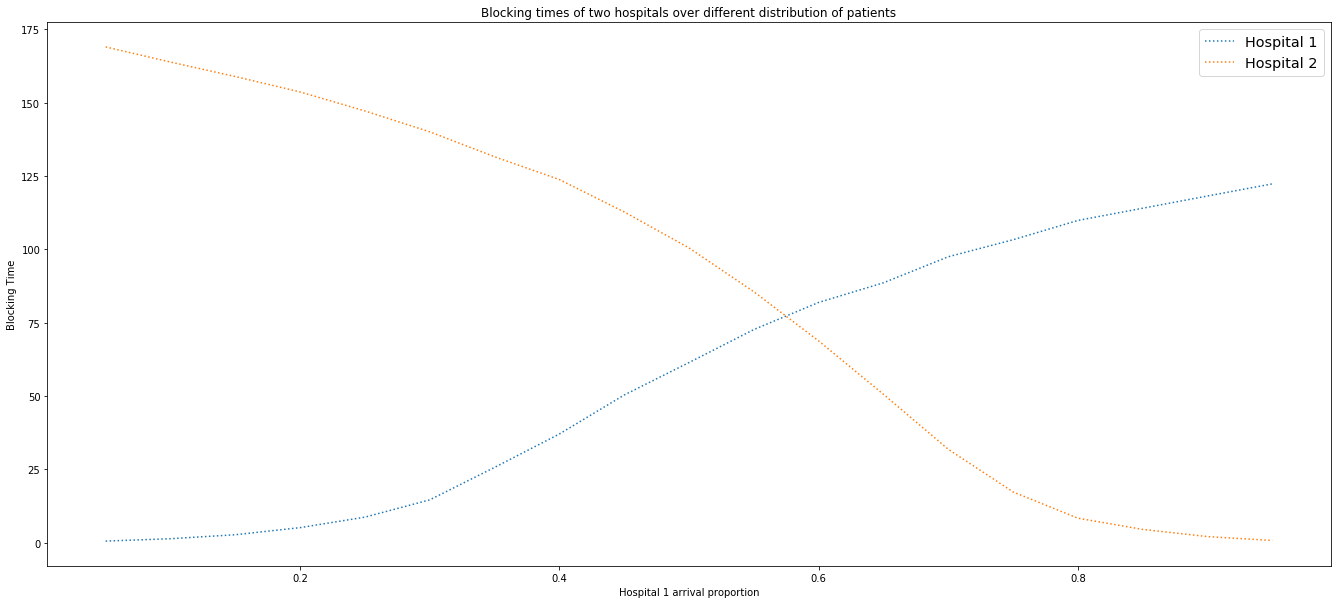

In [36]:
# 2: lambda_2 = 0.3, lambda_1_1 = 0.2, lambda_1_2 = 0.1, mu_1 = 0.05, mu_2 = 0.04, num_of_servers_1 = 8, num_of_servers_2 = 7, threshold_1 = 5, threshold_2 = 4
abg.make_plot_two_hospitals_arrival_split(
    lambda_2=0.3,
    lambda_1_1=0.2,
    lambda_1_2=0.1,
    mu_1=0.05,
    mu_2=0.04,
    num_of_servers_1=8,
    num_of_servers_2=7,
    threshold_1=5,
    threshold_2=4,
    measurement_type="b",
    seed_num_1=seed_num_1,
    seed_num_2=seed_num_2,
    warm_up_time=warm_up_time,
    trials=num_of_trials,
    accuracy=accuracy,
    runtime=runtime,
)
plt.show()


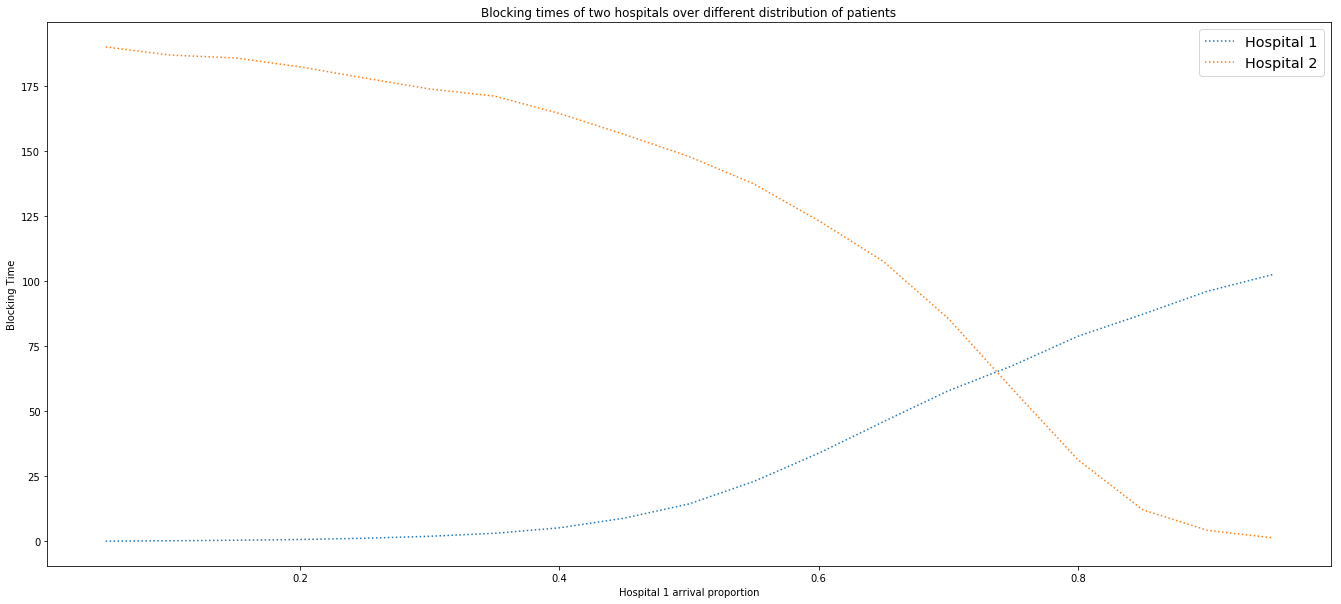

In [37]:
# 3: lambda_2 = 0.45, lambda_1_1 = 0.3, lambda_1_2 = 0.1, mu_1 = 0.05, mu_2 = 0.04, num_of_servers_1 = 12, num_of_servers_2 = 7, threshold_1 = 10, threshold_2 = 4
abg.make_plot_two_hospitals_arrival_split(
    lambda_2=0.45,
    lambda_1_1=0.3,
    lambda_1_2=0.1,
    mu_1=0.05,
    mu_2=0.04,
    num_of_servers_1=12,
    num_of_servers_2=7,
    threshold_1=10,
    threshold_2=4,
    measurement_type="b",
    seed_num_1=seed_num_1,
    seed_num_2=seed_num_2,
    warm_up_time=warm_up_time,
    trials=num_of_trials,
    accuracy=accuracy,
    runtime=runtime,
)
plt.show()


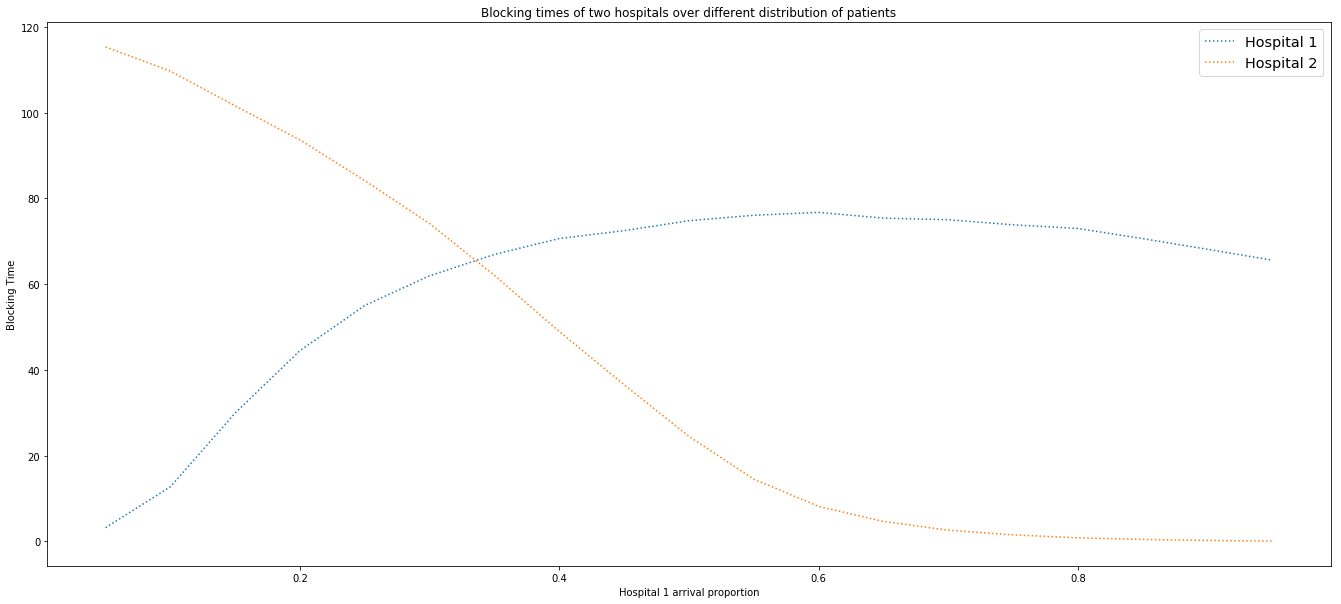

In [38]:
# 4: lambda_2 = 0.5, lambda_1_1 = 0.3, lambda_1_2 = 0.3, mu_1 = 0.05, mu_2 = 0.05, num_of_servers_1 = 13, num_of_servers_2 = 12, threshold_1 = 5, threshold_2 = 10
abg.make_plot_two_hospitals_arrival_split(
    lambda_2=0.5,
    lambda_1_1=0.3,
    lambda_1_2=0.3,
    mu_1=0.05,
    mu_2=0.05,
    num_of_servers_1=13,
    num_of_servers_2=12,
    threshold_1=5,
    threshold_2=10,
    measurement_type="b",
    seed_num_1=seed_num_1,
    seed_num_2=seed_num_2,
    warm_up_time=warm_up_time,
    trials=num_of_trials,
    accuracy=accuracy,
    runtime=runtime,
)
plt.show()


# Model plot 4 - Waiting/Blocking times confidence intervals vs warm-up time


In [39]:
# Queueing Parameters
lambda_2 = 0.1  # Ambulance: 6 arrivals per hour
lambda_1 = 0.08  # Others: 4.8 arrivals per hour
mu = 0.03  # Service time: 1.8 services per hour
num_of_servers = 6  # Number of servers: 6 servers
threshold = 3
seed_num = None
runtime = 1440

# Plot Parameters
min_w = 0
max_w = 600
num_of_trials = 200


###### Waiting Times


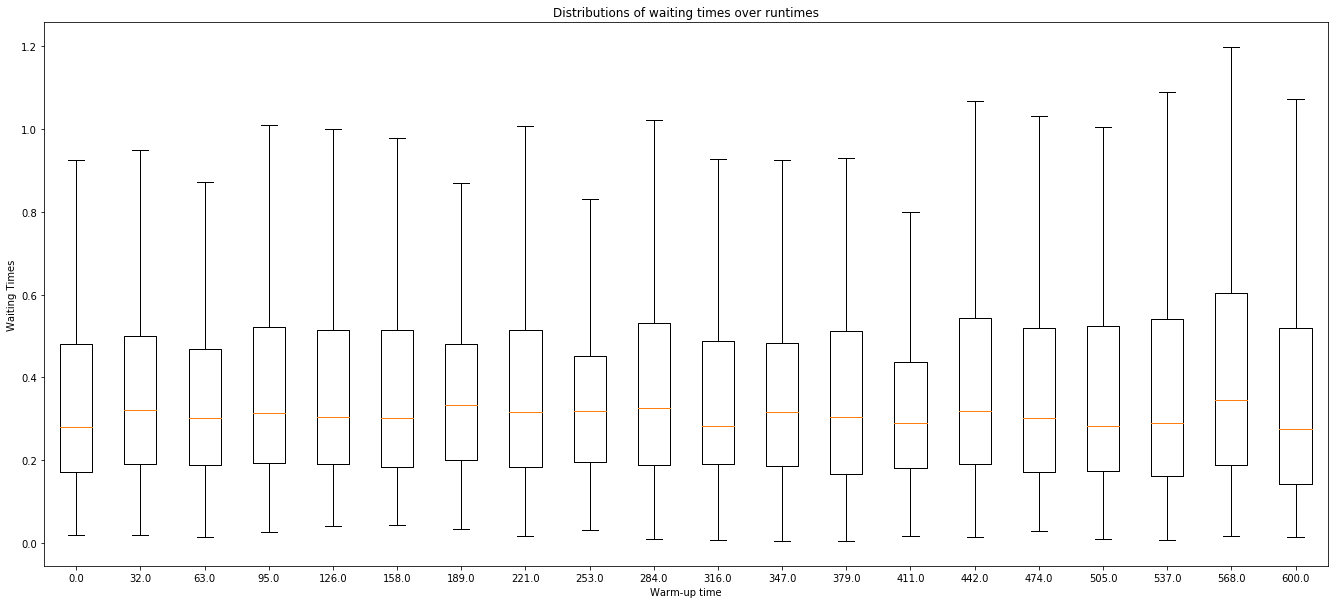

In [40]:
# 1: lambda_2=0.15, lambda_1_1=0.2, mu=0.05, num_of_servers=8, threshold=5
abg.make_plot_of_confidence_intervals_over_warm_up_time(
    lambda_2=0.15,
    lambda_1=0.2,
    mu=0.05,
    num_of_servers=8,
    threshold=5,
    num_of_trials=num_of_trials,
    min_w=min_w,
    max_w=max_w,
    seed_num=seed_num,
    measurement_type="w",
    runtime=runtime,
)
plt.show()


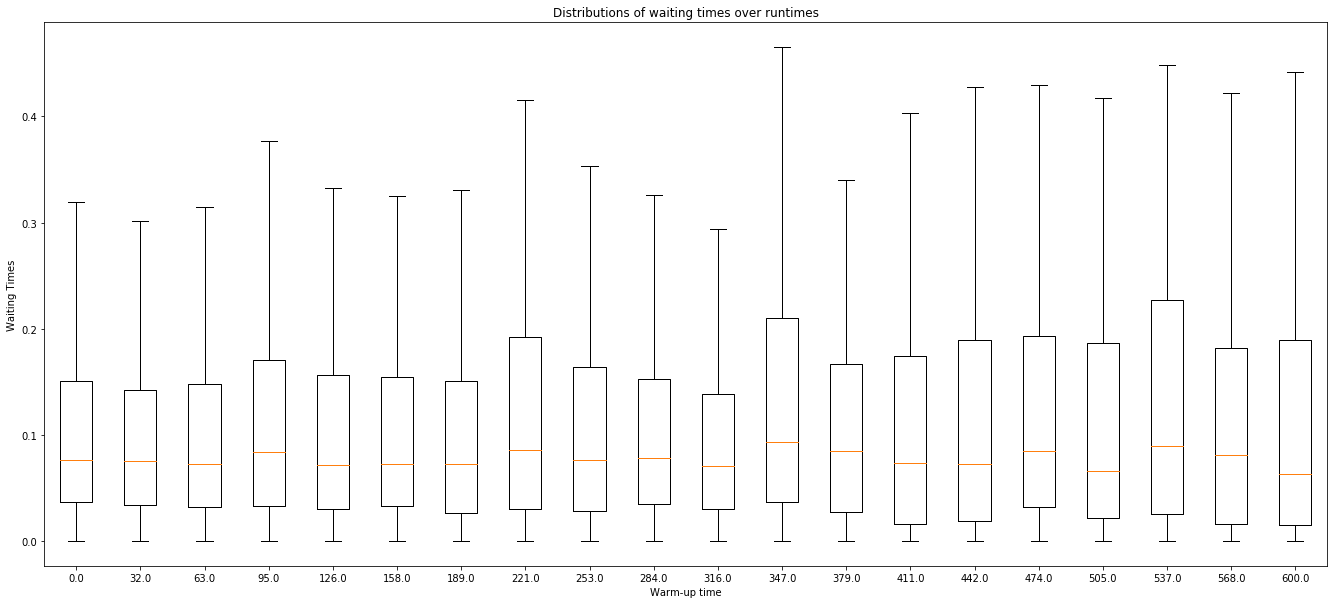

In [41]:
# 2: lambda_2=0.15, lambda_1=0.1, mu=0.04, num_of_servers=7, threshold=4
abg.make_plot_of_confidence_intervals_over_warm_up_time(
    lambda_2=0.15,
    lambda_1=0.1,
    mu=0.04,
    num_of_servers=7,
    threshold=4,
    num_of_trials=num_of_trials,
    min_w=min_w,
    max_w=max_w,
    seed_num=seed_num,
    measurement_type="w",
    runtime=runtime,
)
plt.show()


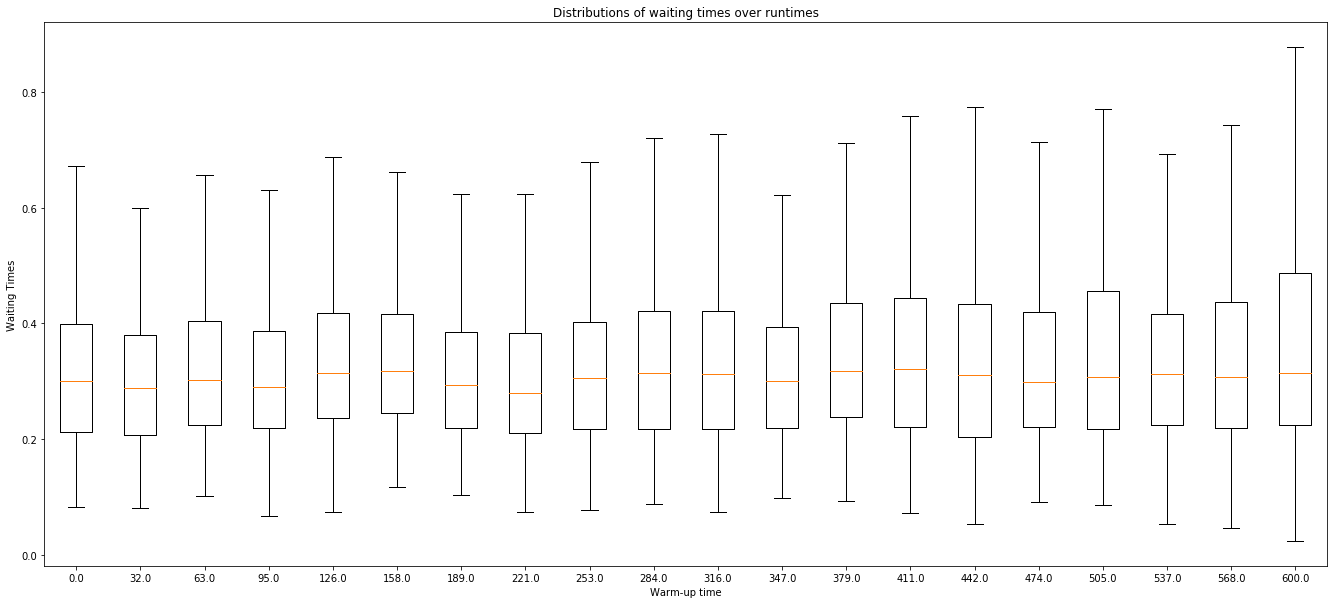

In [42]:
# 3: lambda_2=0.3, lambda_1=0.3, mu=0.05, num_of_servers=12, threshold=10
abg.make_plot_of_confidence_intervals_over_warm_up_time(
    lambda_2=0.3,
    lambda_1=0.3,
    mu=0.05,
    num_of_servers=12,
    threshold=10,
    num_of_trials=num_of_trials,
    min_w=min_w,
    max_w=max_w,
    seed_num=seed_num,
    measurement_type="w",
    runtime=runtime,
)
plt.show()


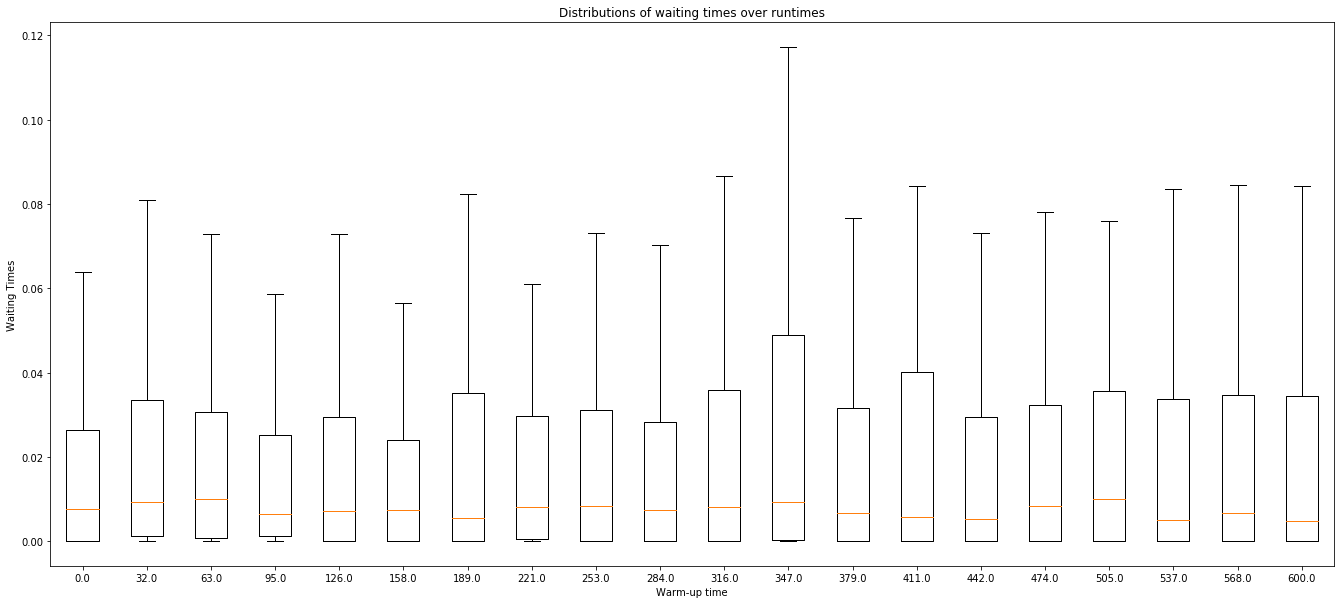

In [43]:
# 4: lambda_2=0.2, lambda_1=0.3, mu=0.05, num_of_servers=13, threshold=5
abg.make_plot_of_confidence_intervals_over_warm_up_time(
    lambda_2=0.2,
    lambda_1=0.3,
    mu=0.05,
    num_of_servers=13,
    threshold=5,
    num_of_trials=num_of_trials,
    min_w=min_w,
    max_w=max_w,
    seed_num=seed_num,
    measurement_type="w",
    runtime=runtime,
)
plt.show()


###### Blocking Times


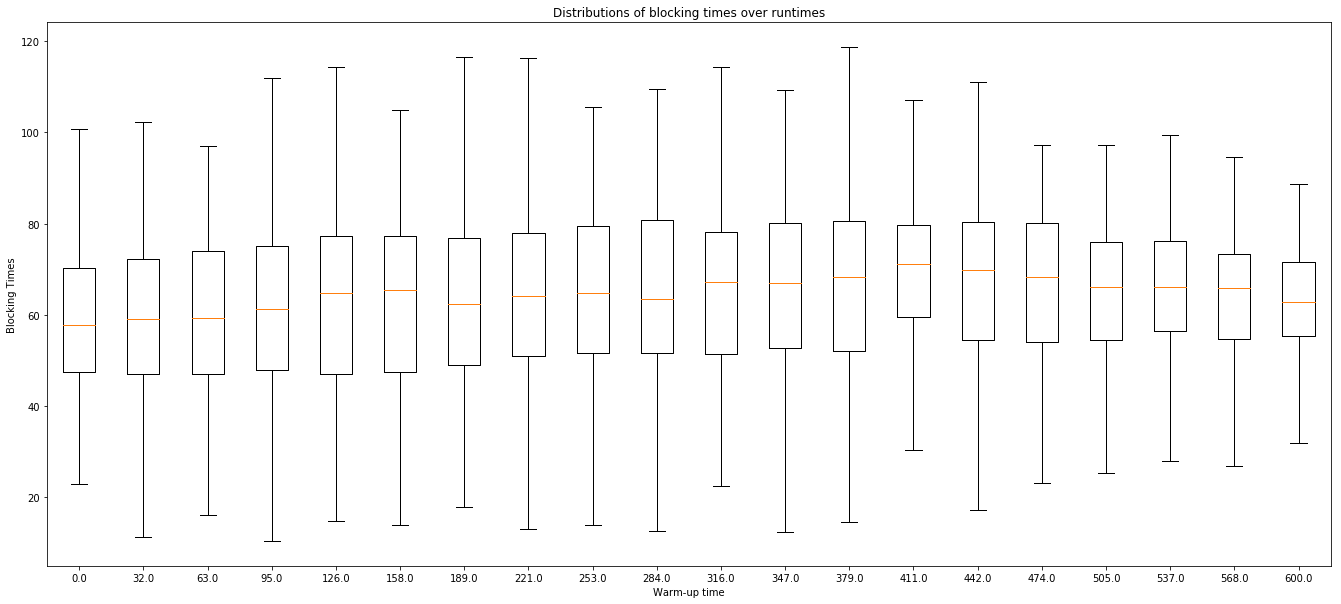

In [44]:
# 1: lambda_2=0.15, lambda_1=0.2, mu=0.05, num_of_servers=8, threshold=5
abg.make_plot_of_confidence_intervals_over_warm_up_time(
    lambda_2=0.15,
    lambda_1=0.2,
    mu=0.05,
    num_of_servers=8,
    threshold=5,
    num_of_trials=num_of_trials,
    min_w=min_w,
    max_w=max_w,
    seed_num=seed_num,
    measurement_type="b",
    runtime=runtime,
)
plt.show()


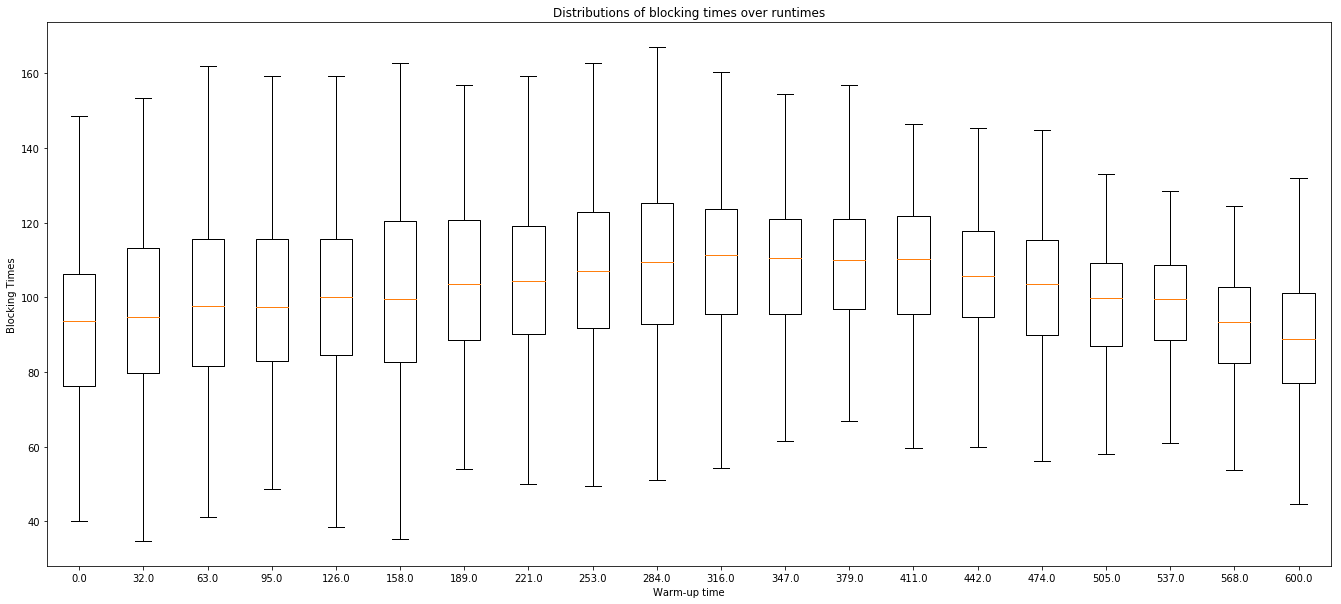

In [45]:
# 2: lambda_2=0.15, lambda_1=0.1, mu=0.04, num_of_servers=7, threshold=4
abg.make_plot_of_confidence_intervals_over_warm_up_time(
    lambda_2=0.15,
    lambda_1=0.1,
    mu=0.04,
    num_of_servers=7,
    threshold=4,
    num_of_trials=num_of_trials,
    min_w=min_w,
    max_w=max_w,
    seed_num=seed_num,
    measurement_type="b",
    runtime=runtime,
)
plt.show()


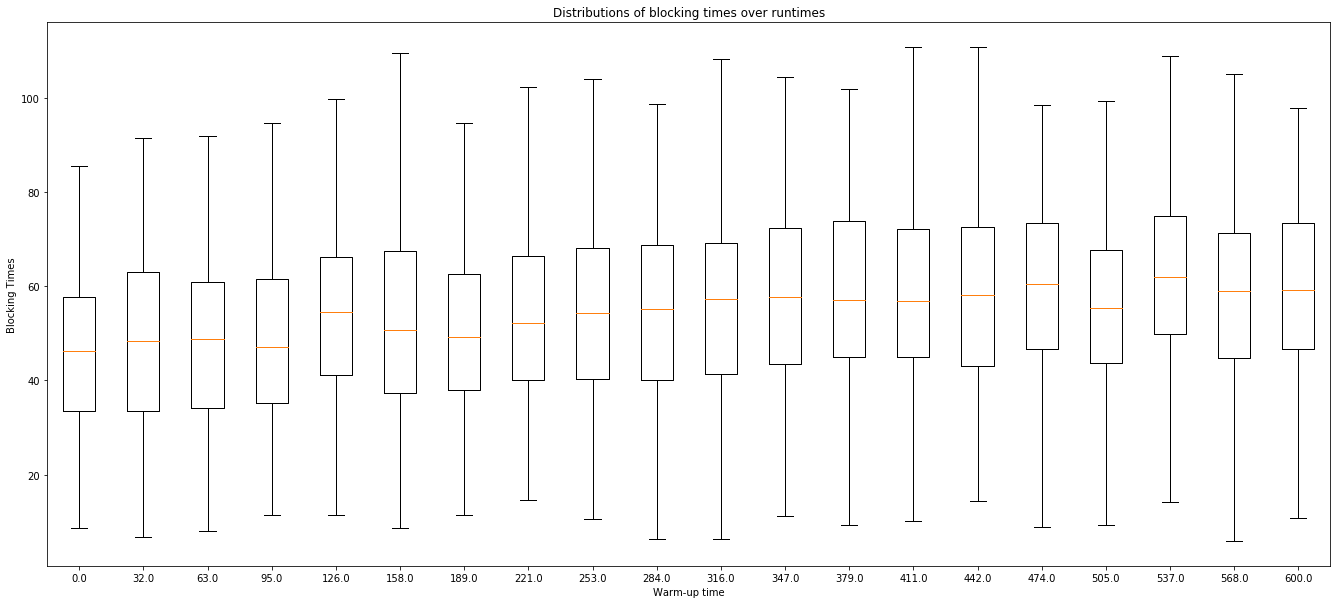

In [46]:
# 3: lambda_2=0.3, lambda_1=0.3, mu=0.05, num_of_servers=12, threshold=10
abg.make_plot_of_confidence_intervals_over_warm_up_time(
    lambda_2=0.3,
    lambda_1=0.3,
    mu=0.05,
    num_of_servers=12,
    threshold=10,
    num_of_trials=num_of_trials,
    min_w=min_w,
    max_w=max_w,
    seed_num=seed_num,
    measurement_type="b",
    runtime=runtime,
)
plt.show()


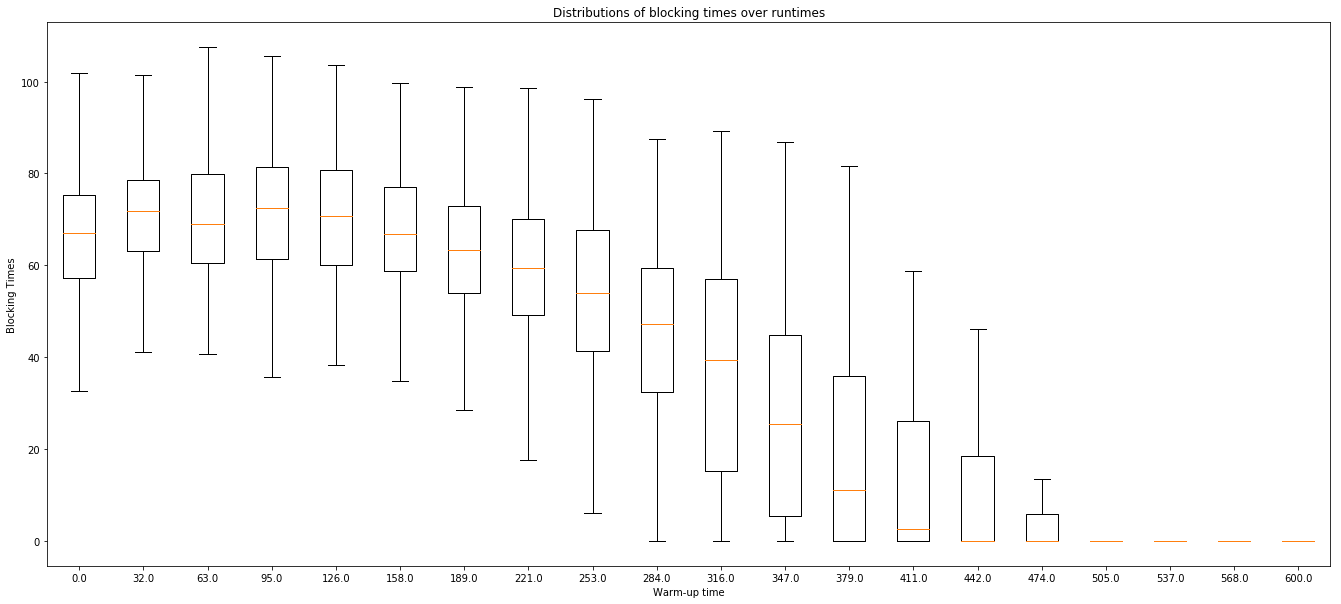

In [47]:
# 4: lambda_2=0.2, lambda_1=0.3, mu=0.05, num_of_servers=13, threshold=5
abg.make_plot_of_confidence_intervals_over_warm_up_time(
    lambda_2=0.2,
    lambda_1=0.3,
    mu=0.05,
    num_of_servers=13,
    threshold=5,
    num_of_trials=num_of_trials,
    min_w=min_w,
    max_w=max_w,
    seed_num=seed_num,
    measurement_type="b",
    runtime=runtime,
)
plt.show()


# Model plot 5 - Waiting/Blocking times confidence intervals vs runtime


In [48]:
# Queueing Parameters
lambda_2 = 0.1  # Ambulance: 6 arrivals per hour
lambda_1 = 0.08  # Others: 4.8 arrivals per hour
mu = 0.03  # Service time: 1.8 services per hour
num_of_servers = 6  # Number of servers: 6 servers
threshold = 4
seed_num = None
warm_up_time = 200

# Plot Parameters
min_r = 700
max_r = 28000
num_of_trials = 20


###### Waiting Times


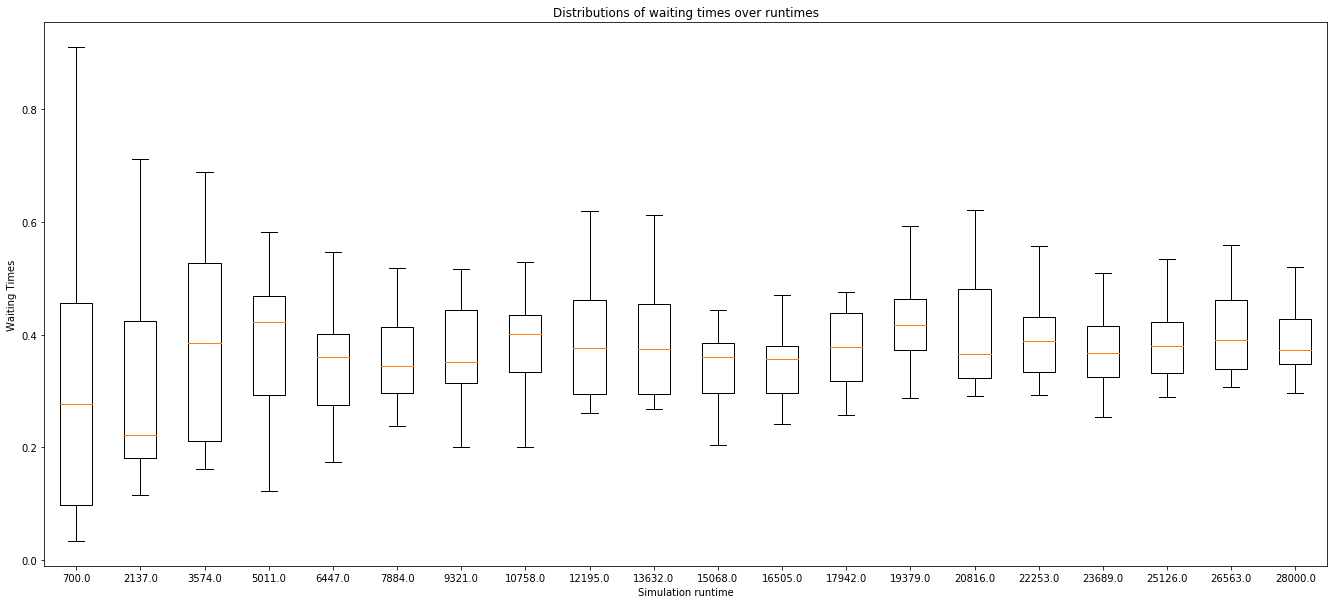

In [49]:
# 1: lambda_2=0.15, lambda_1=0.2, mu=0.05, num_of_servers=8, threshold=5
abg.make_plot_of_confidence_intervals_over_runtime(
    lambda_2=0.15,
    lambda_1=0.2,
    mu=0.05,
    num_of_servers=8,
    threshold=5,
    warm_up_time=warm_up_time,
    num_of_trials=num_of_trials,
    min_r=min_r,
    max_r=max_r,
    seed_num=seed_num,
    measurement_type="w",
)
plt.show()


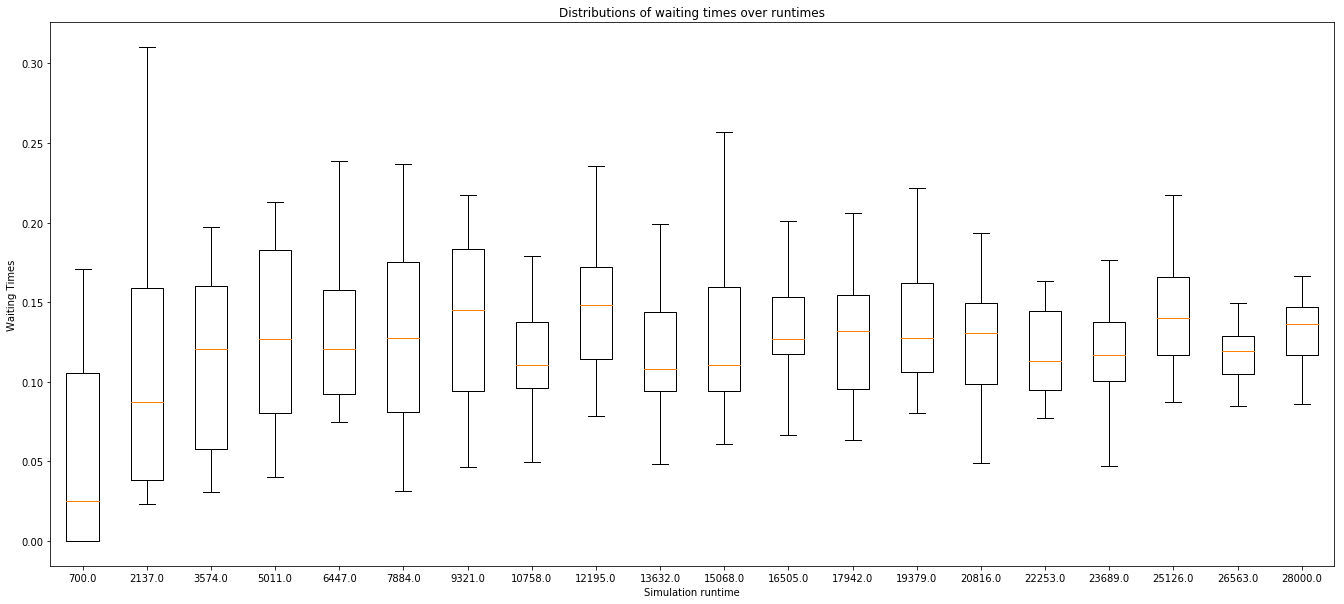

In [50]:
# 2: lambda_2=0.15, lambda_1=0.1, mu=0.04, num_of_servers=7, threshold=4
abg.make_plot_of_confidence_intervals_over_runtime(
    lambda_2=0.15,
    lambda_1=0.1,
    mu=0.04,
    num_of_servers=7,
    threshold=4,
    warm_up_time=warm_up_time,
    num_of_trials=num_of_trials,
    min_r=min_r,
    max_r=max_r,
    seed_num=seed_num,
    measurement_type="w",
)
plt.show()


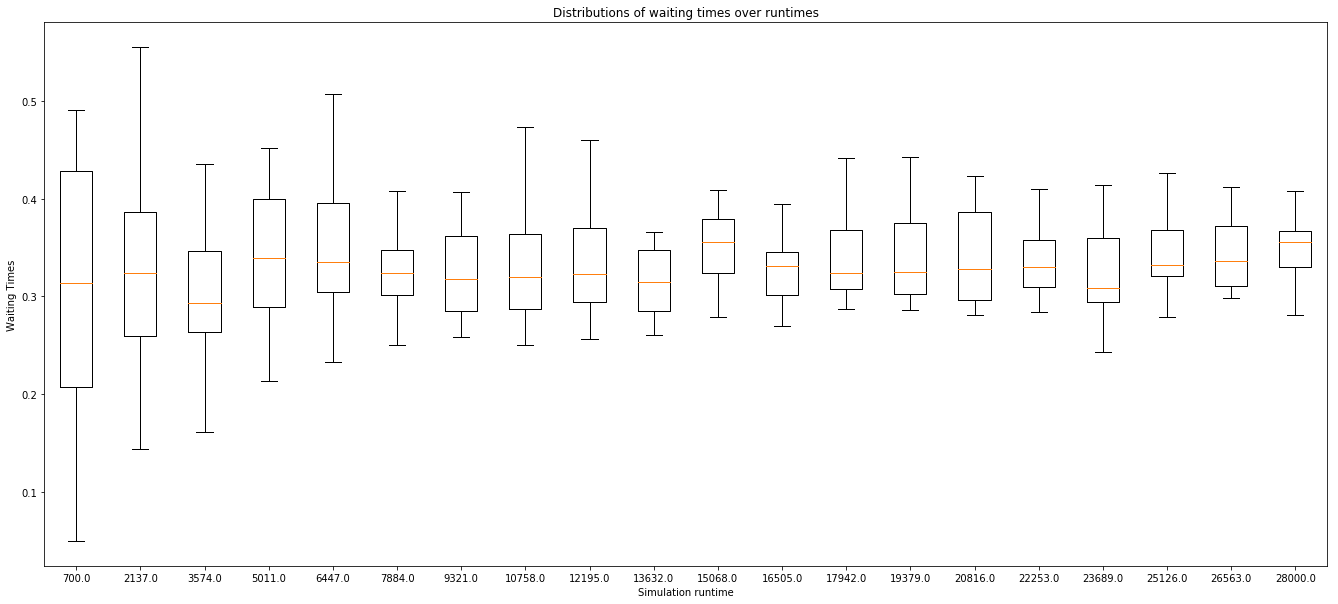

In [51]:
# 3: lambda_2=0.3, lambda_1=0.3, mu=0.05, num_of_servers=12, threshold=10
abg.make_plot_of_confidence_intervals_over_runtime(
    lambda_2=0.3,
    lambda_1=0.3,
    mu=0.05,
    num_of_servers=12,
    threshold=10,
    warm_up_time=warm_up_time,
    num_of_trials=num_of_trials,
    min_r=min_r,
    max_r=max_r,
    seed_num=seed_num,
    measurement_type="w",
)
plt.show()


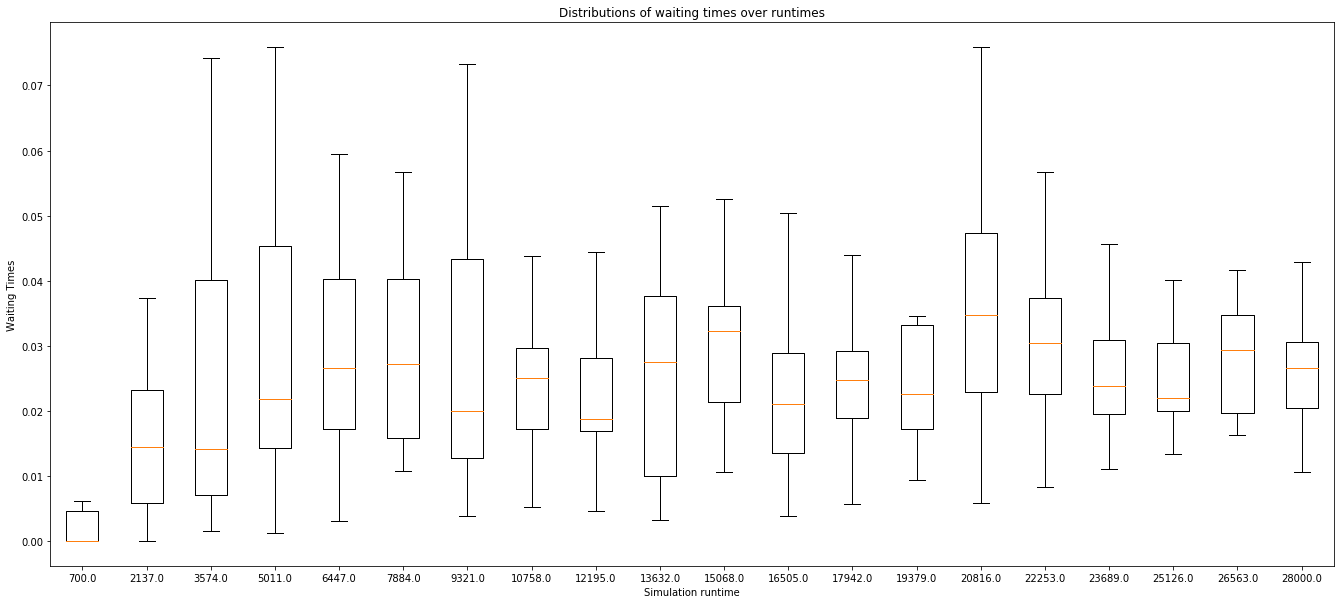

In [52]:
# 4: lambda_2=0.2, lambda_1=0.3, mu=0.05, num_of_servers=13, threshold=5
abg.make_plot_of_confidence_intervals_over_runtime(
    lambda_2=0.2,
    lambda_1=0.3,
    mu=0.05,
    num_of_servers=13,
    threshold=5,
    warm_up_time=warm_up_time,
    num_of_trials=num_of_trials,
    min_r=min_r,
    max_r=max_r,
    seed_num=seed_num,
    measurement_type="w",
)
plt.show()


###### Blocking Times


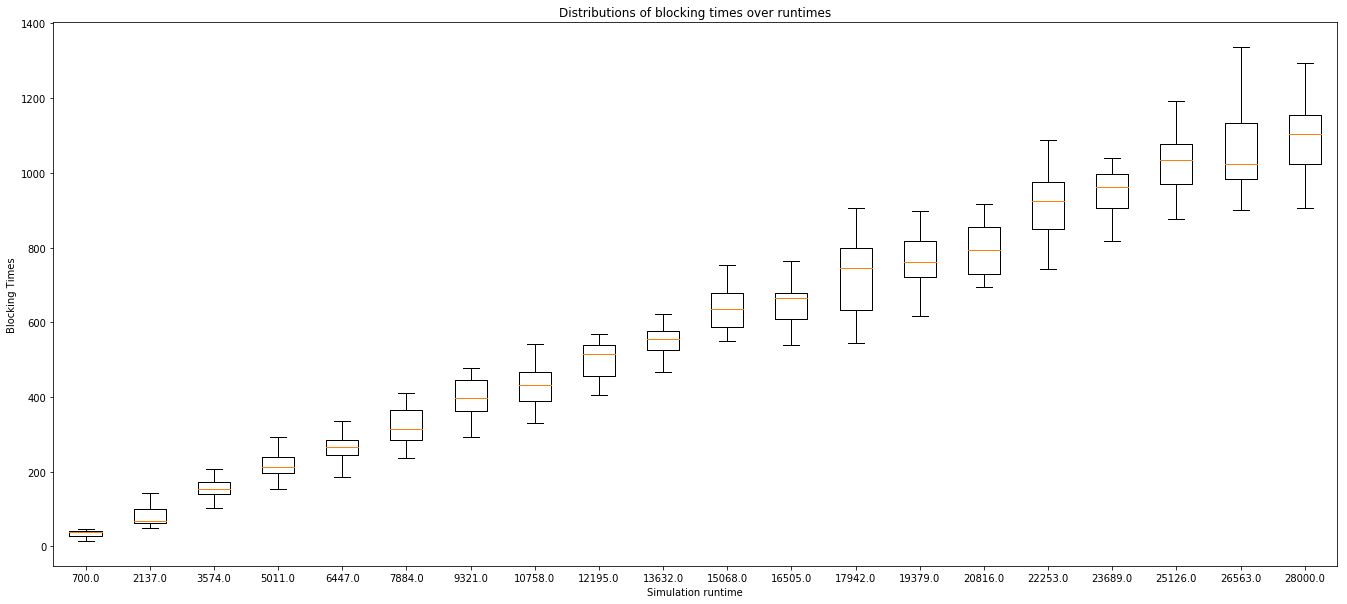

In [53]:
# 1: lambda_2=0.15, lambda_1=0.2, mu=0.05, num_of_servers=8, threshold=5
abg.make_plot_of_confidence_intervals_over_runtime(
    lambda_2=0.15,
    lambda_1=0.2,
    mu=0.05,
    num_of_servers=8,
    threshold=5,
    warm_up_time=warm_up_time,
    num_of_trials=num_of_trials,
    min_r=min_r,
    max_r=max_r,
    seed_num=seed_num,
    measurement_type="b",
)
plt.show()


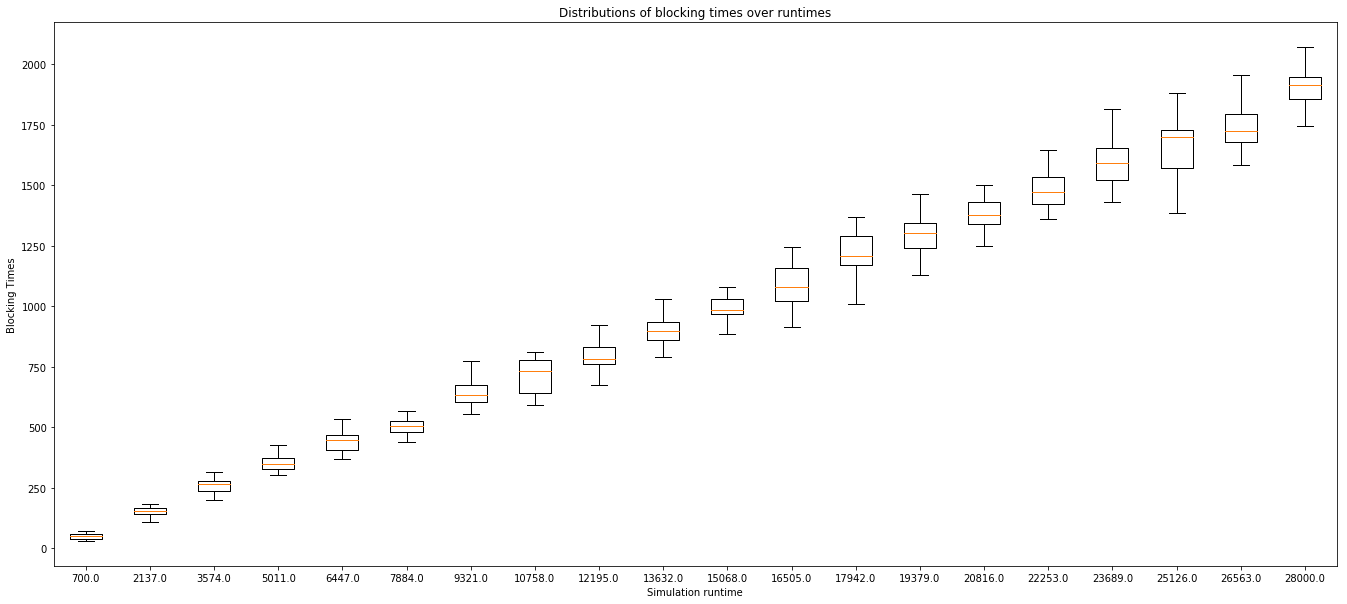

In [54]:
# 2: lambda_2=0.15, lambda_1=0.1, mu=0.04, num_of_servers=7, threshold=4
abg.make_plot_of_confidence_intervals_over_runtime(
    lambda_2=0.15,
    lambda_1=0.1,
    mu=0.04,
    num_of_servers=7,
    threshold=4,
    warm_up_time=warm_up_time,
    num_of_trials=num_of_trials,
    min_r=min_r,
    max_r=max_r,
    seed_num=seed_num,
    measurement_type="b",
)
plt.show()


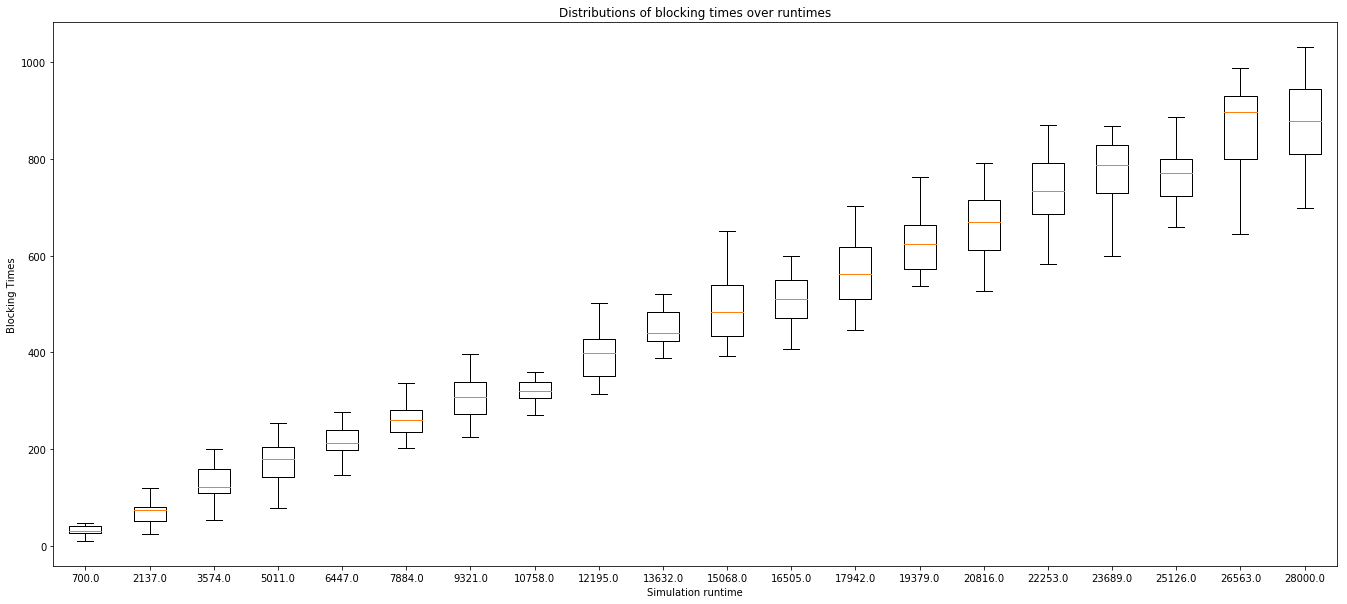

In [55]:
# 3: lambda_2=0.3, lambda_1=0.3, mu=0.05, num_of_servers=12, threshold=10
abg.make_plot_of_confidence_intervals_over_runtime(
    lambda_2=0.3,
    lambda_1=0.3,
    mu=0.05,
    num_of_servers=12,
    threshold=10,
    warm_up_time=warm_up_time,
    num_of_trials=num_of_trials,
    min_r=min_r,
    max_r=max_r,
    seed_num=seed_num,
    measurement_type="b",
)
plt.show()


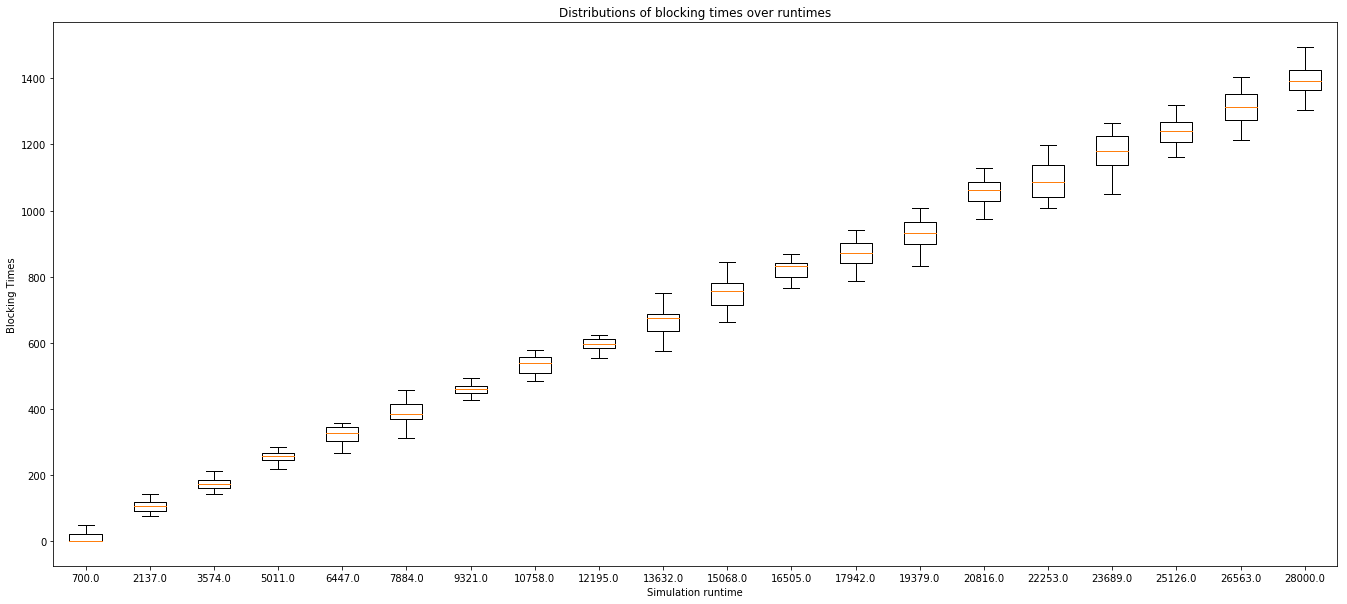

In [56]:
# 4: lambda_2=0.2, lambda_1=0.3, mu=0.05, num_of_servers=13, threshold=5
abg.make_plot_of_confidence_intervals_over_runtime(
    lambda_2=0.2,
    lambda_1=0.3,
    mu=0.05,
    num_of_servers=13,
    threshold=5,
    warm_up_time=warm_up_time,
    num_of_trials=num_of_trials,
    min_r=min_r,
    max_r=max_r,
    seed_num=seed_num,
    measurement_type="b",
)
plt.show()


# Examples for testing


In [ ]:
lambda_2 = 0.15, lambda_1 = 0.2, mu = 0.05, num_of_servers = 8, threshold = 5
lambda_2 = 0.15, lambda_1 = 0.1, mu = 0.04, num_of_servers = 7, threshold = 4
lambda_2 = 0.3, lambda_1 = 0.3, mu = 0.05, num_of_servers = 12, threshold = 10
lambda_2 = 0.2, lambda_1 = 0.3, mu = 0.05, num_of_servers = 13, threshold = 5


In [170]:
ciw.seed(5)
Q = ciw.Simulation(build_model(1, 1, 2, 1))

Q.simulate_until_max_time(100)
records = Q.get_all_records()
waits = [r.waiting_time for r in records]
blocks = [r.time_blocked for r in records]

print(len(records))
print(sum(waits))
print(sum(blocks))


290
1089.854729732795
0.0


In [171]:
ciw.seed(5)
Q = ciw.Simulation(build_model(1, 1, 2, 1), node_class=build_custom_node(7))

Q.simulate_until_max_time(100)
records = Q.get_all_records()
waits = [r.waiting_time for r in records]
blocks = [r.time_blocked for r in records]

print(len(records))
print(sum(waits))
print(sum(blocks))


290
1040.318433783405
52.00679633745028


In [172]:
sim_results = []
for i in range(10):
    simulation = simulate_model(0.15, 0.2, 0.05, 8, 4, i)
    sim_results.append(len(simulation.get_all_records()))


In [173]:
sim_results


[699, 719, 759, 715, 703, 719, 695, 685, 775, 719]

# To Discuss


In [12]:
# Simulation Parameters
lambda_2 = 0.15  # Ambulance: 6 arrivals per hour
lambda_1 = 0.2  # Others: 3 arrivals per hour
mu = 0.05  # Service time: 3 services per hour
num_of_servers = 8  # Number of servers: 8 servers
threshold = 4  # Threshold of accepting ambulance patients
seed_num = None  # ciw.seed value


In [13]:
dummy_model = abg.models.simulate_model(
    lambda_2, lambda_1, mu, num_of_servers, threshold, seed_num
).get_all_records()


In [15]:
dummy_waits_node_1 = [i.waiting_time for i in dummy_model if i.node == 1]
dummy_blocs_node_2 = [i.time_blocked for i in dummy_model if i.node == 2]


In [16]:
print(all(dummy_waits_node_1) == 0)
print(all(dummy_blocs_node_2) == 0)


True
True


###### For any parmeters all waiting times from node 1 will be 0 and all blocking times from node 2 will be 0


In [69]:
dummy_waits_node_1


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [70]:
dummy_blocs_node_2


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

# Dummy Cells
